In [1]:
import os
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objects as go

In [2]:
def plotter(arr_y, arr_x=None, *coords):
    fig = go.Figure()
    fig.add_trace(go.Scatter(y=arr_y, x=arr_x))
    if coords:
        fig.add_trace(go.Scatter(x=[i[0] for i in coords],
                                 y=[i[1] for i in coords], 
                                 mode='markers'))
    fig.update_layout(
        showlegend=False,
        margin={'t': 30, 'b': 20, 'l': 0, 'r':0}
    )
    py.offline.iplot(fig)

In [3]:
def prepare_files(directory):
    files = os.listdir(directory)
    file_df_map = {}
    for file in files:
        if file.endswith('csv'):
            file_arr = pd.read_csv(f'{directory}/{file}', header=None)[0].to_numpy()
            file_arr = file_arr[np.logical_not(np.isnan(file_arr))]
            file_df_map[f'{file}'] = file_arr
    return file_df_map

In [4]:
files25 = prepare_files('./2572c')
files15 = prepare_files('./1589c')
files7 = prepare_files('./762c')

In [7]:
def extract_single_wave(arr):
    first_argmin = np.argmin(arr[:1000])
    return arr[first_argmin : first_argmin + 1000]
    

In [8]:
waves25, waves15, waves7 = {}, {}, {}

In [9]:
waves25 = {name: extract_single_wave(arr) for name, arr in files25.items()}
waves15 = {name: extract_single_wave(arr) for name, arr in files15.items()}
waves7 = {name: extract_single_wave(arr) for name, arr in files7.items()}

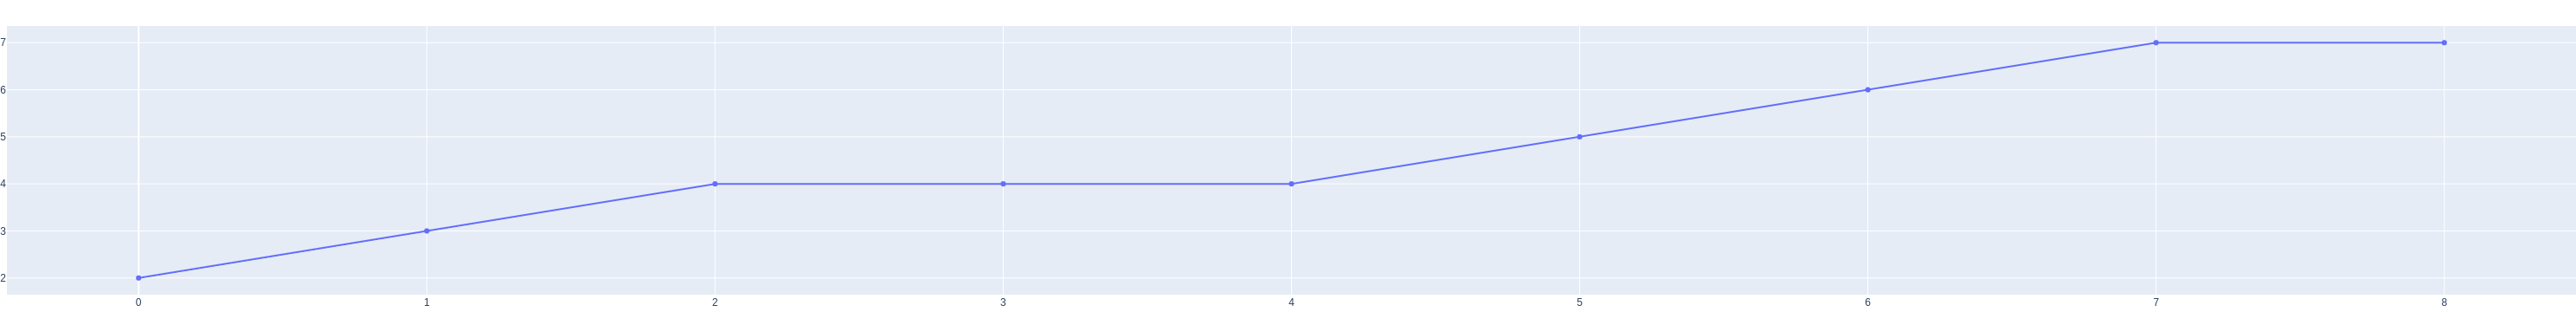

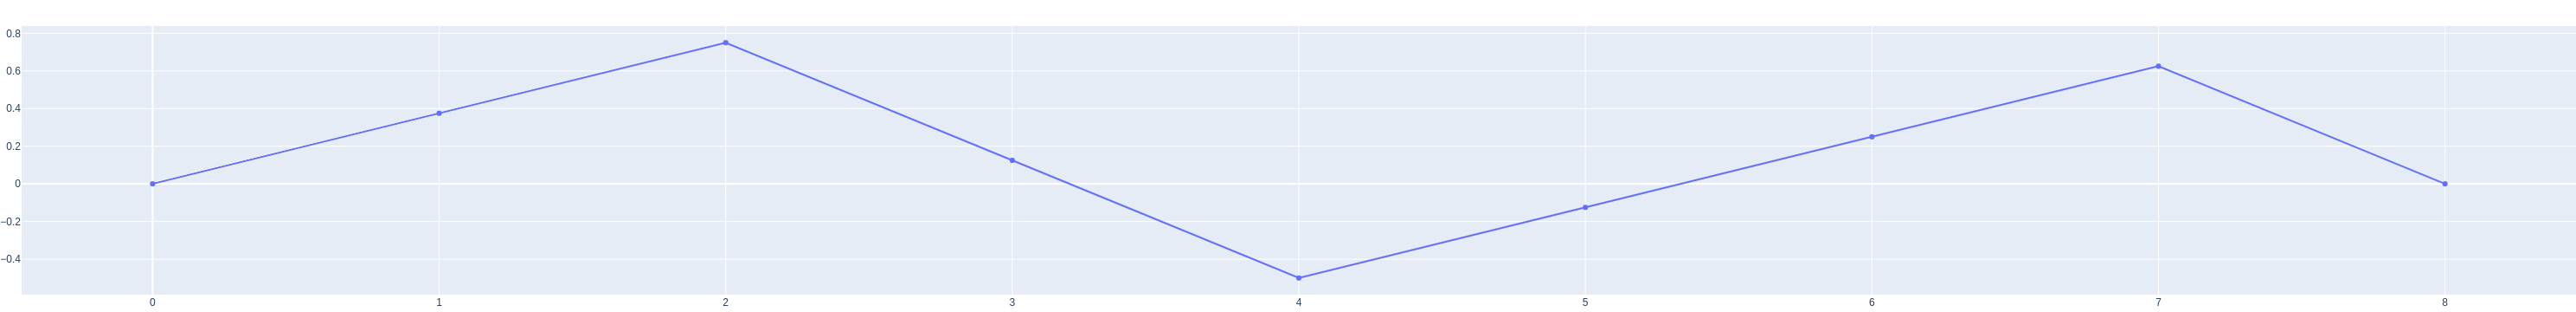

In [14]:
# proof of concept

a = np.array([2, 3, 4, 4, 4, 5, 6, 7, 7])
diagonal = np.linspace(np.min(a), np.max(a), len(a))
plotter(a)
plotter(a - diagonal)

In [29]:
def get_curvature(arr):
    ''' find max diff between actual wave and diagonal from its starting minimum and max at the end '''
    starting_min_idx = 250
    max_idx = np.argmax(arr)
    diagonal_length = max_idx - starting_min_idx
    diagonal = np.linspace(arr[starting_min_idx], arr[max_idx], diagonal_length)
    return np.max(np.absolute(diagonal - arr[starting_min_idx: max_idx]))
    

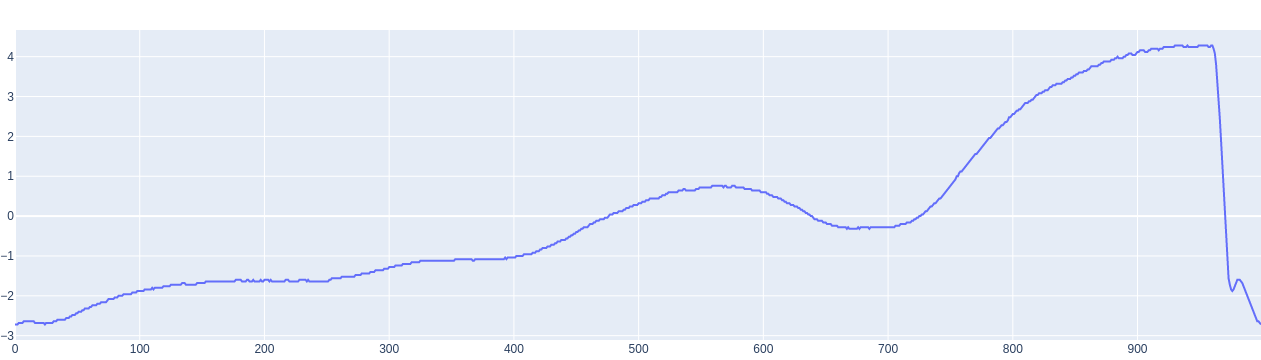

2.607010309278351


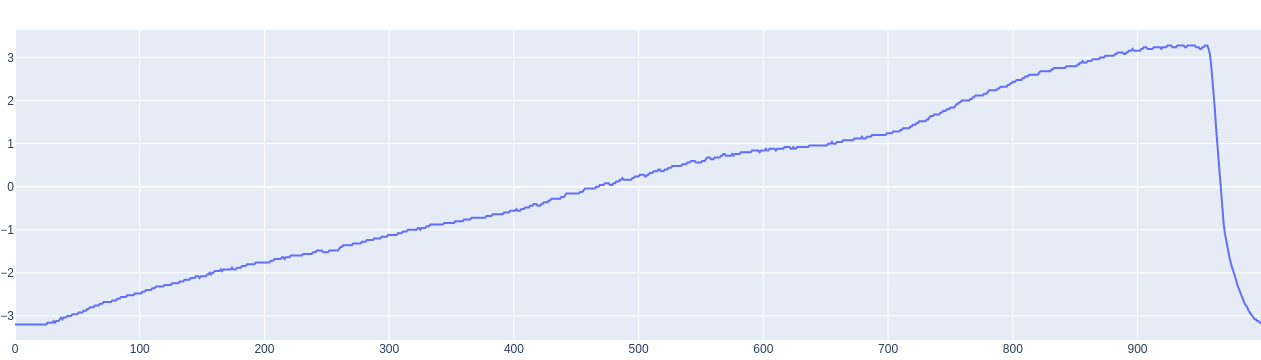

0.4752451708766714


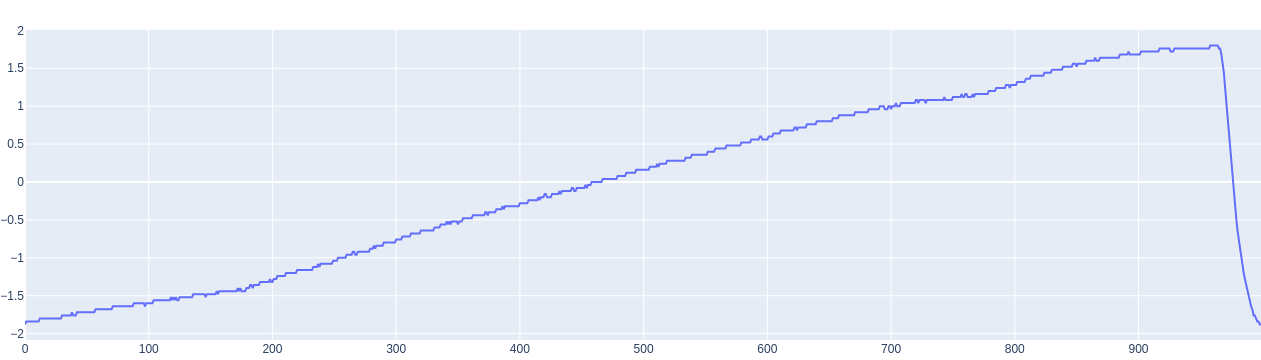

0.28107496463932125


In [30]:
example1 = waves15['1803.28ppm.csv']
example2 = waves15['196.08ppm.csv']
example3 = waves25['3750.00ppm.csv']

curvature1 = get_curvature(example1)
curvature2 = get_curvature(example2)
curvature3 = get_curvature(example3)

plotter(example1)
print(curvature1)
plotter(example2)
print(curvature2)
plotter(example3)
print(curvature3)

In [31]:
def find_edges(arr):
    end = np.argmax(arr)
    search_range = 450 if get_curvature(arr) > 0.3 else 300
    beginning = end - search_range      
    arr_slice = arr[beginning:end]
    diagonal = np.linspace(arr_slice[0], arr_slice[-1], len(arr_slice)) # get the diagonal
    twisted_arr = arr_slice - diagonal
    peak_idx = np.argmin(twisted_arr)
    twisted_peak_beginning_idx = np.argmax(twisted_arr[:peak_idx])
    twisted_peak_end_idx = np.argmax(twisted_arr[peak_idx:]) + peak_idx
    arr_beginning_idx = twisted_peak_beginning_idx + beginning
    arr_end_idx = twisted_peak_end_idx + beginning
    return arr_beginning_idx, arr_end_idx
    
    
    
    

1803.28ppm.csv


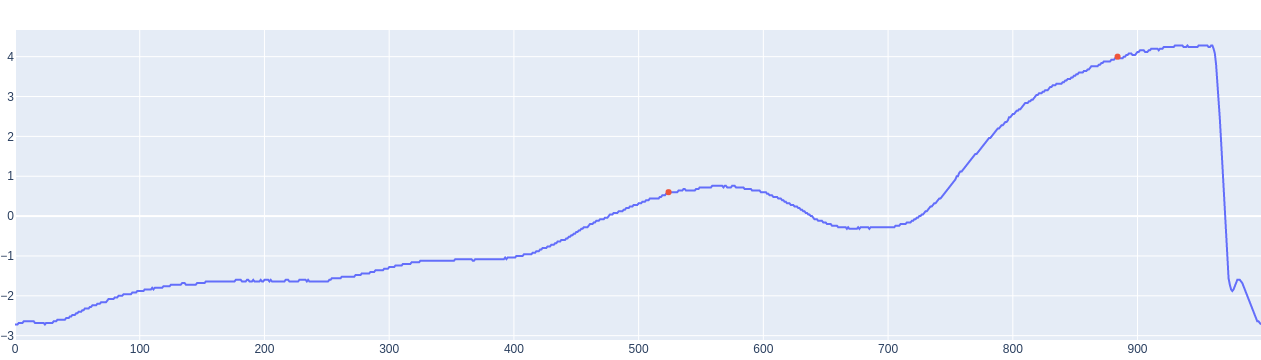

636.70ppm.csv


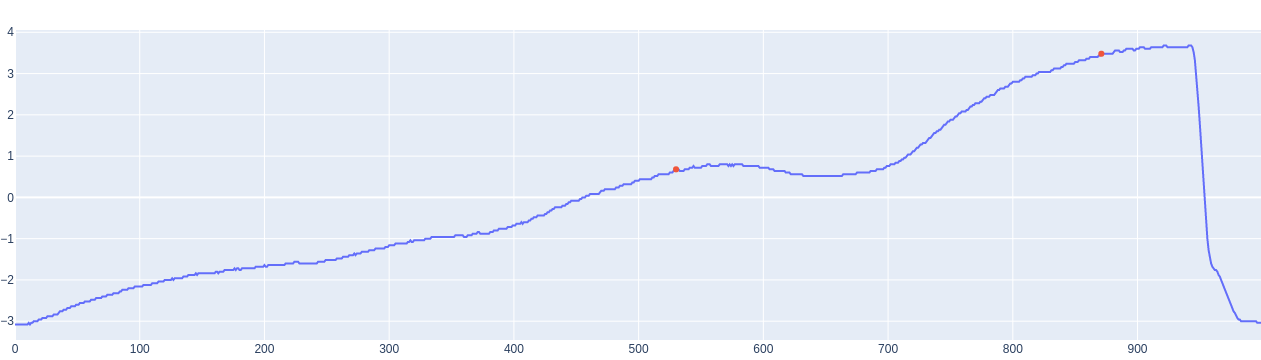

2307.69ppm.csv


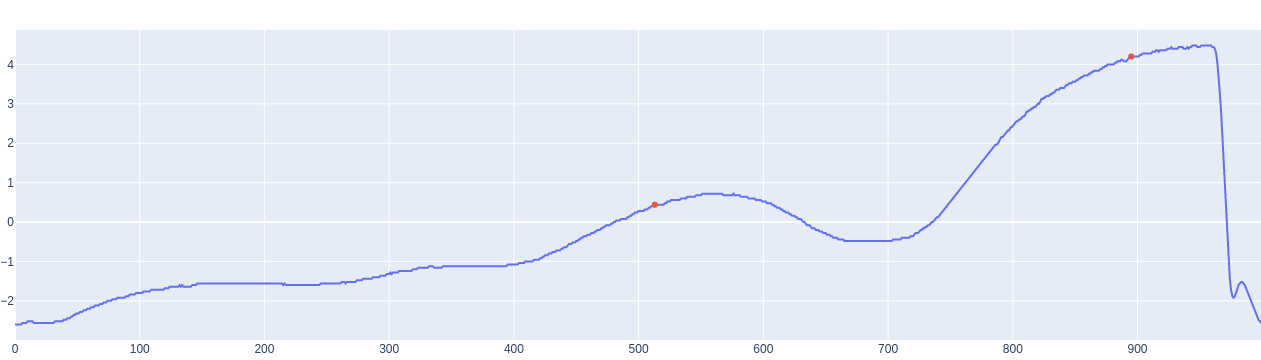

1071.43ppm.csv


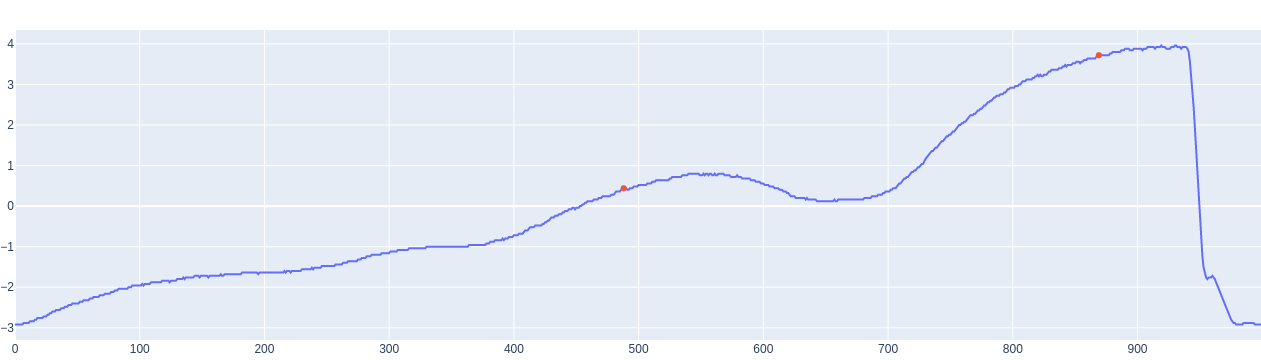

1228.07ppm.csv


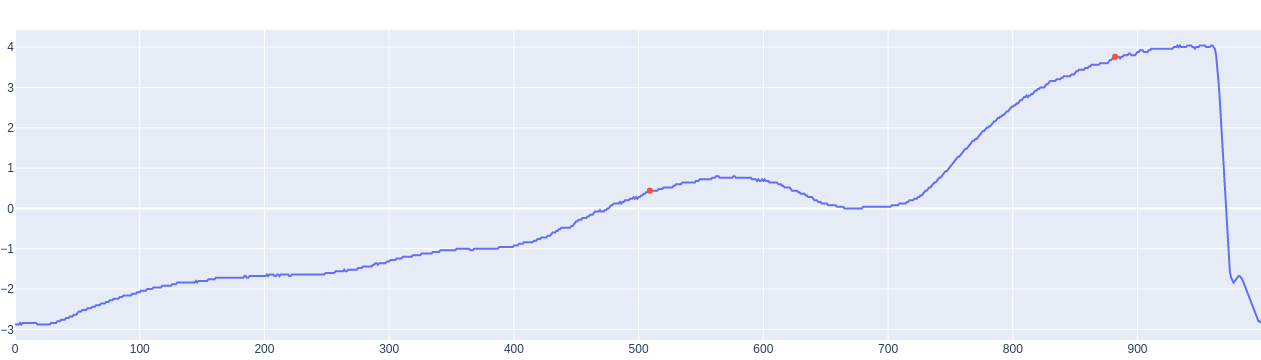

384.62ppm.csv


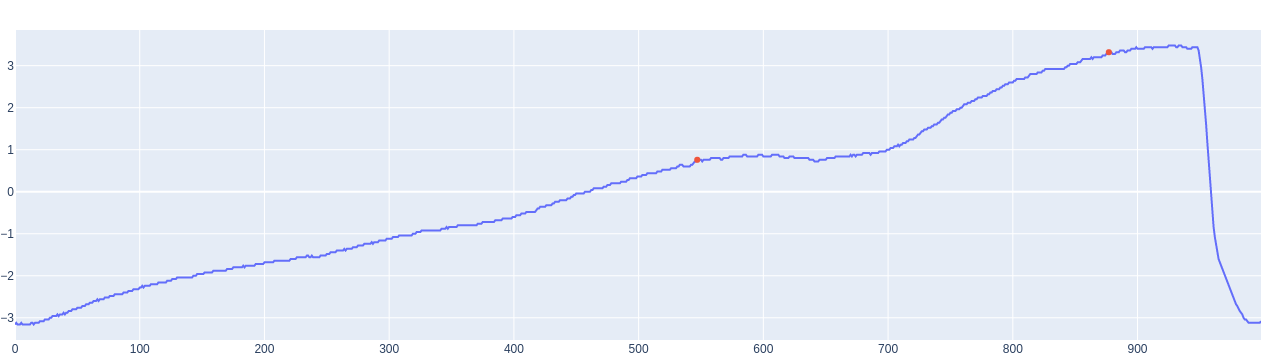

2537.31ppm.csv


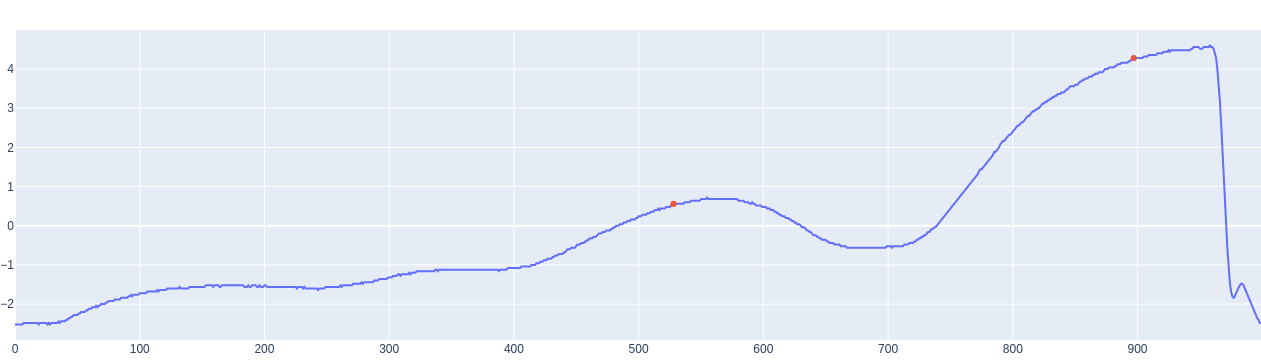

157.48ppm.csv


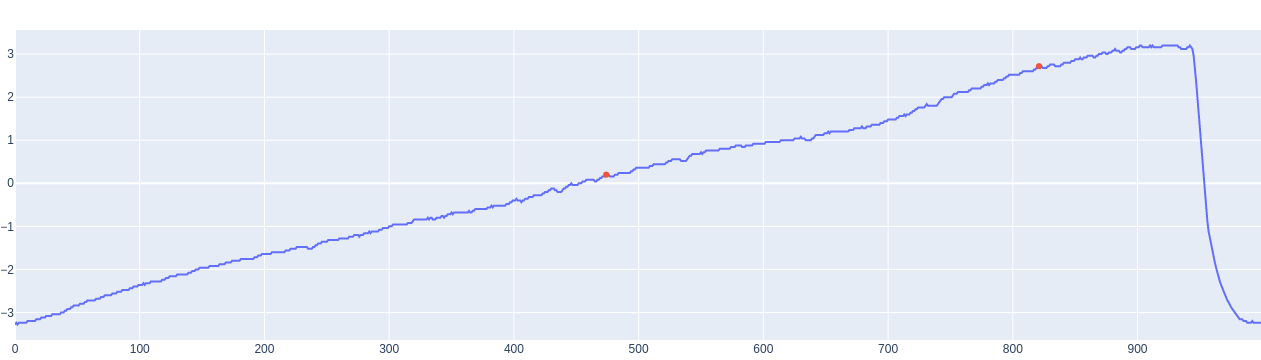

0.00ppm.csv


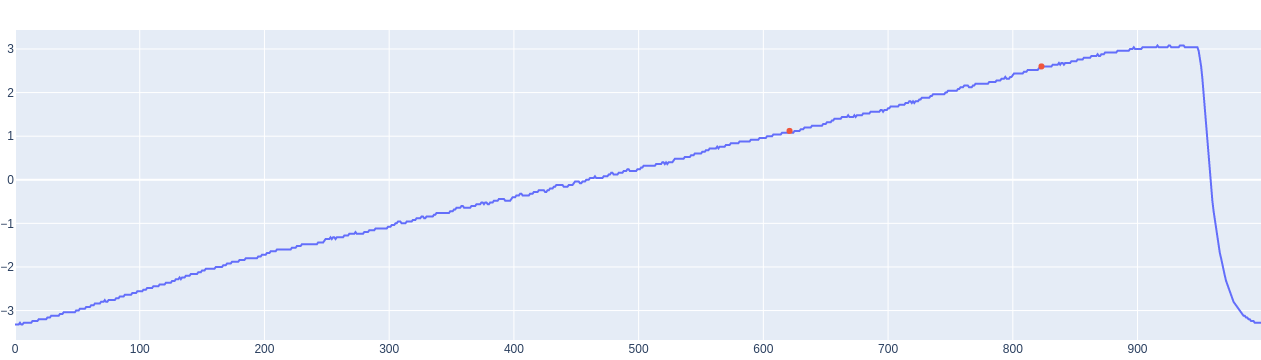

39.84ppm.csv


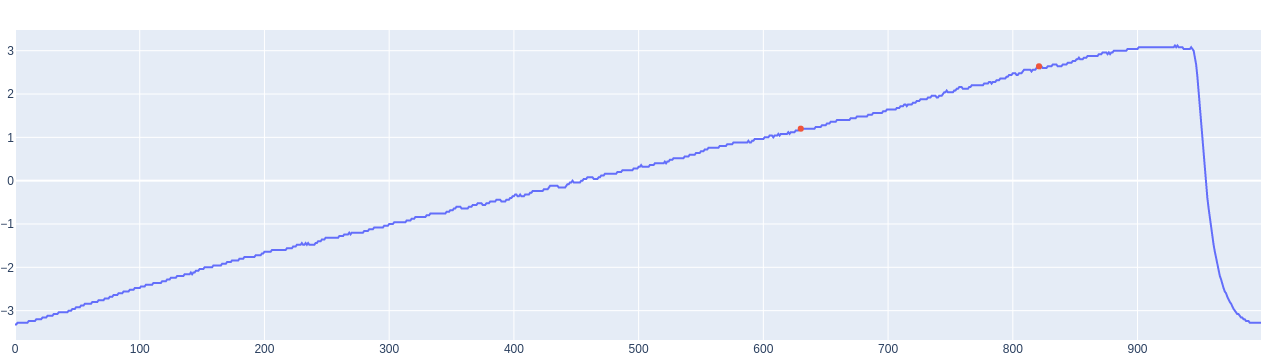

808.82ppm.csv


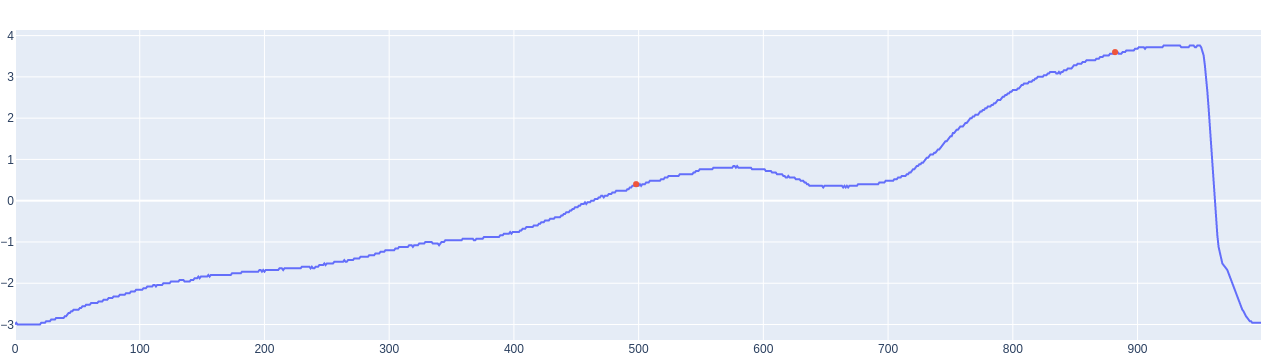

566.04ppm.csv


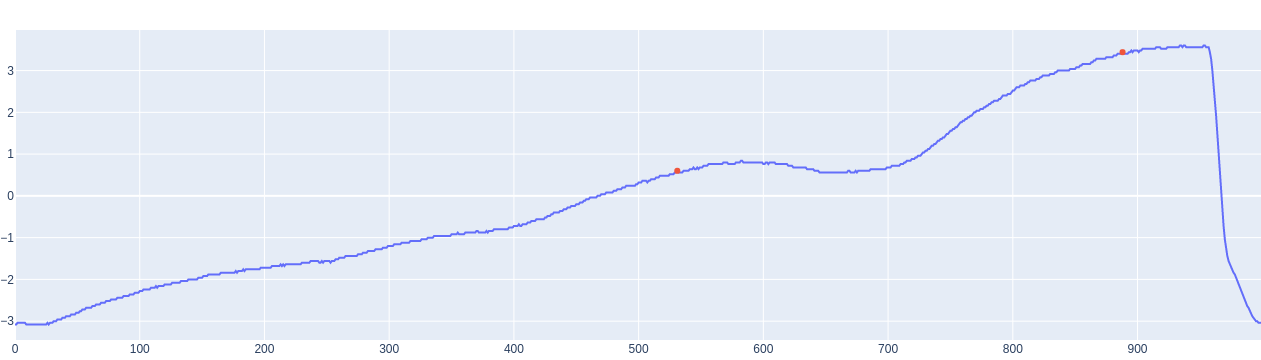

196.08ppm.csv


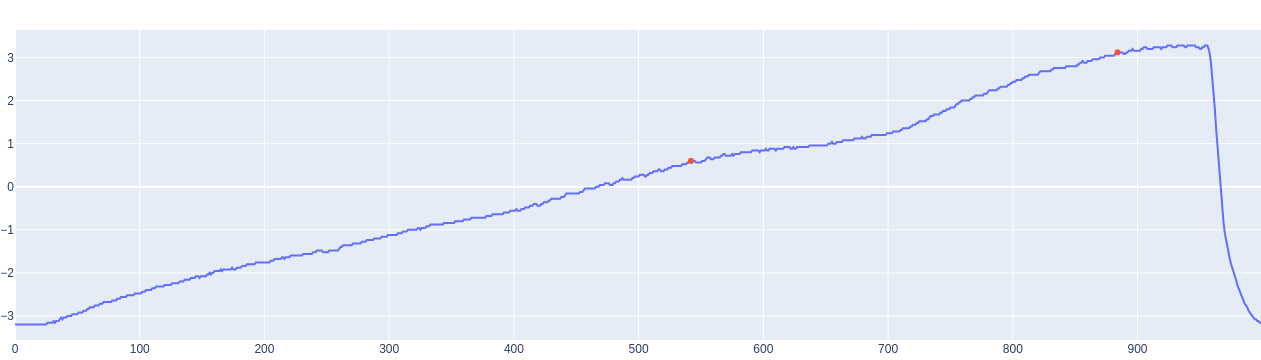

27.92ppm.csv


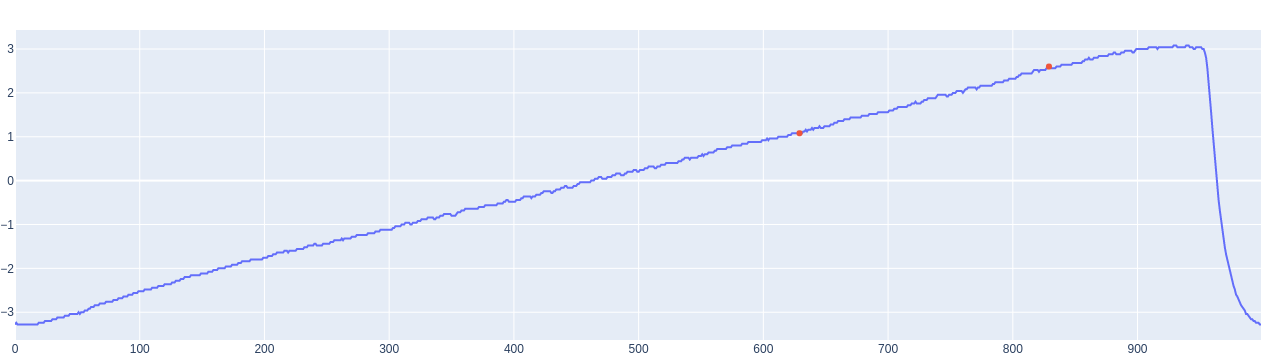

909.09ppm.csv


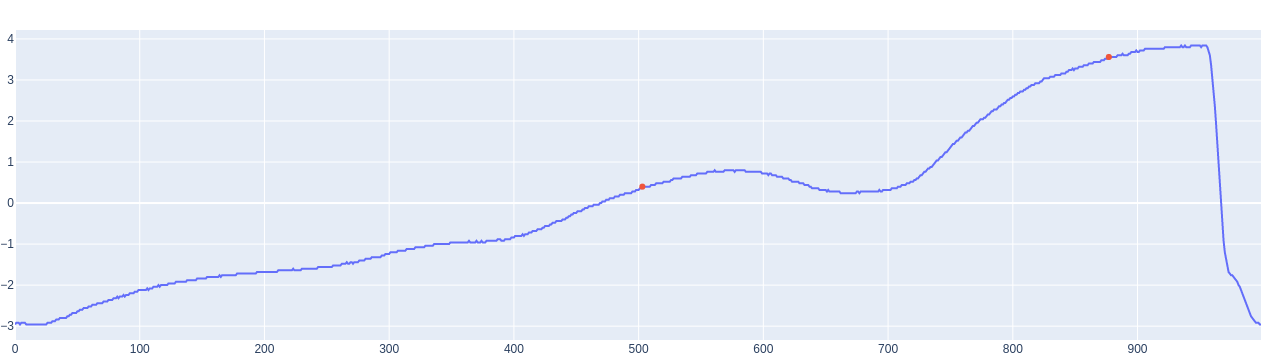

2063.49ppm.csv


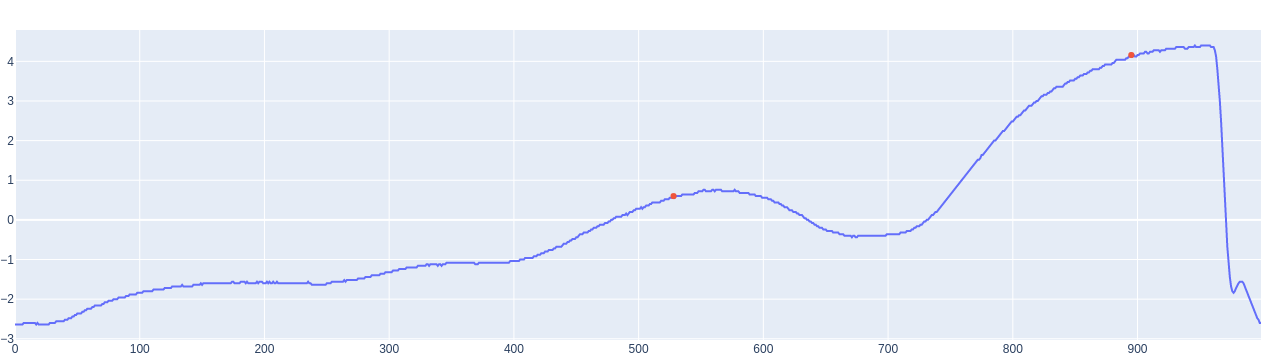

706.32ppm.csv


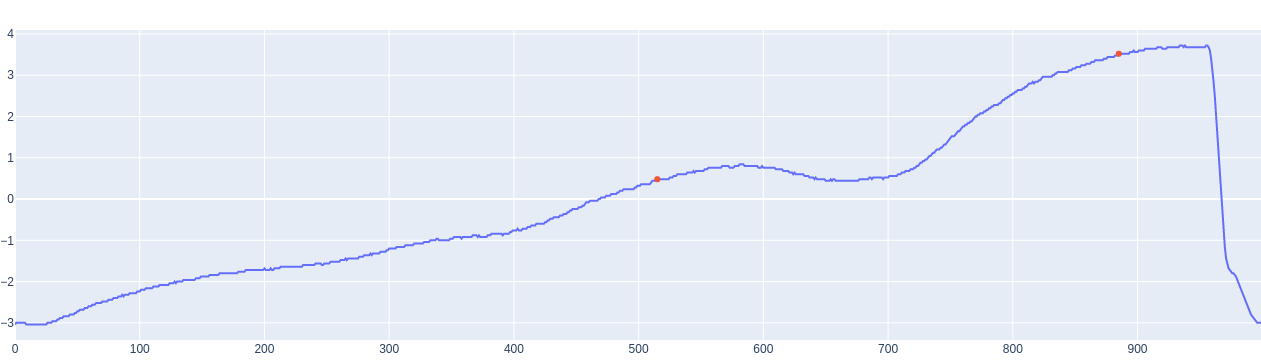

2857.14ppm.csv


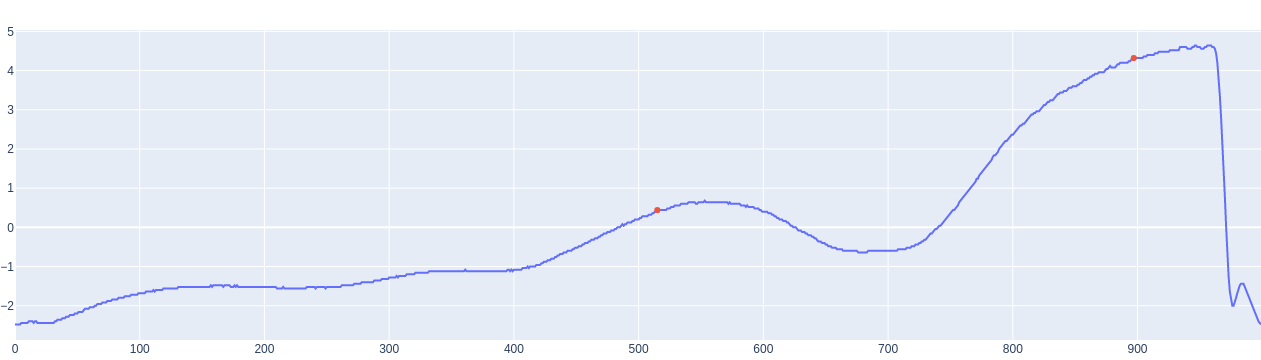

458.02ppm.csv


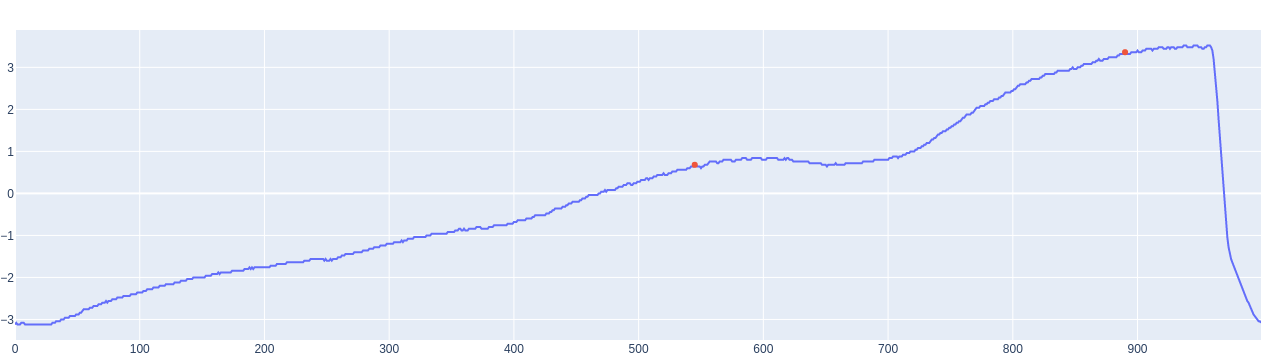

2424.24ppm.csv


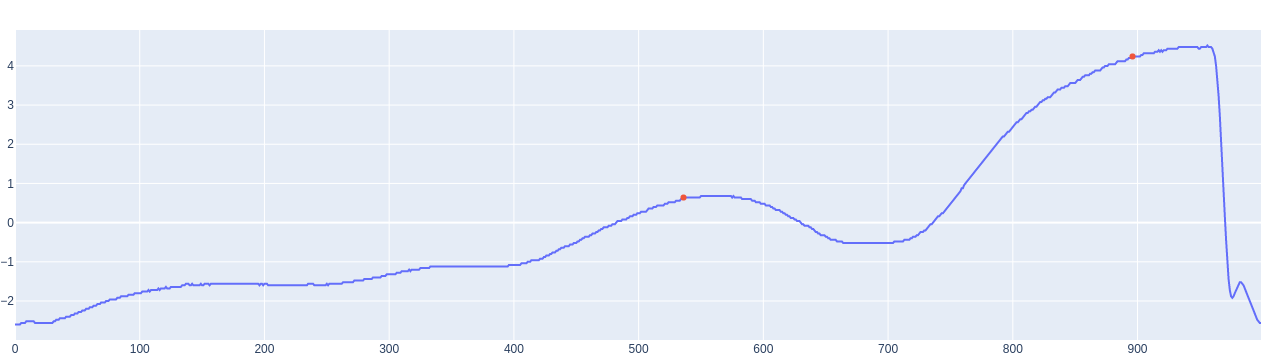

1935.48ppm.csv


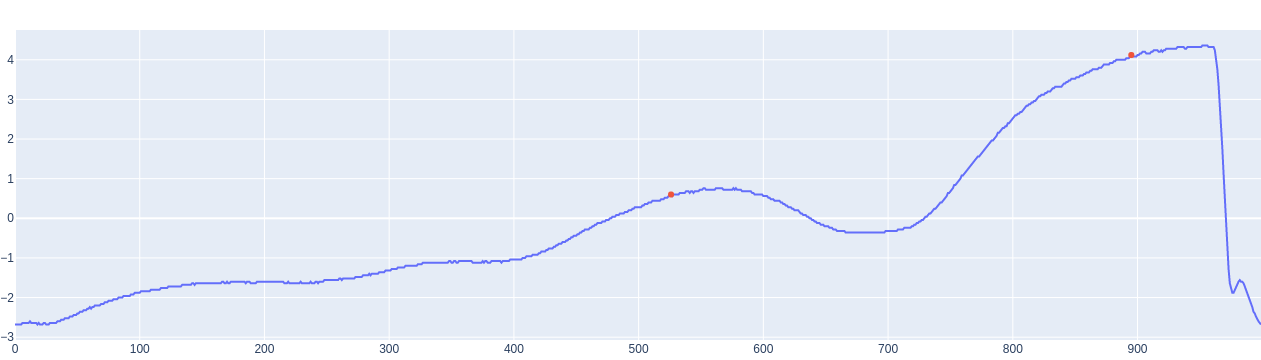

272.37ppm.csv


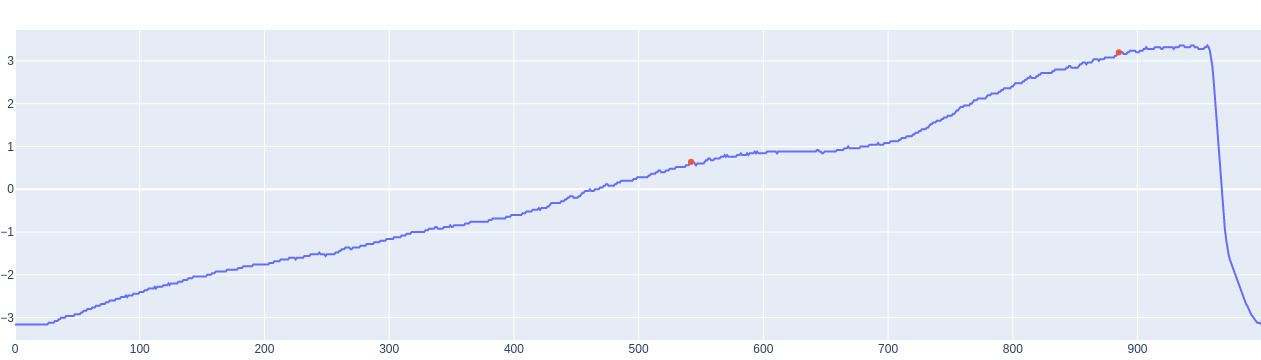

2187.50ppm.csv


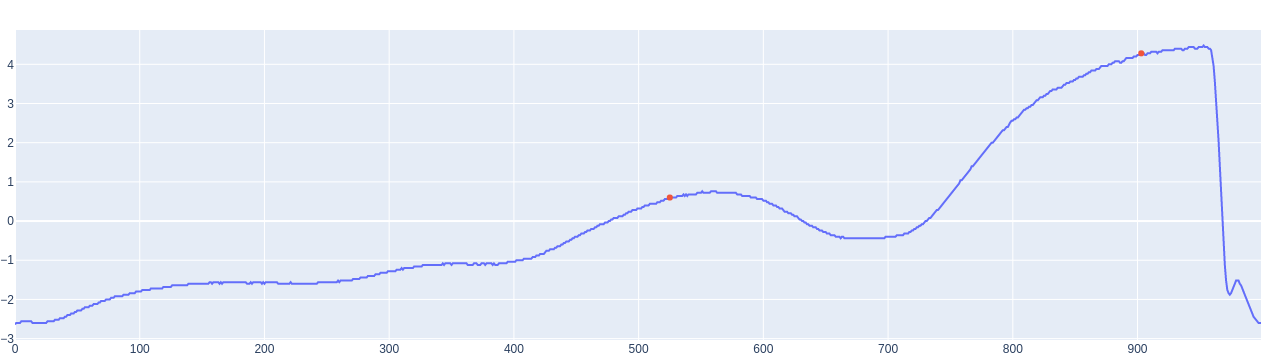

1379.31ppm.csv


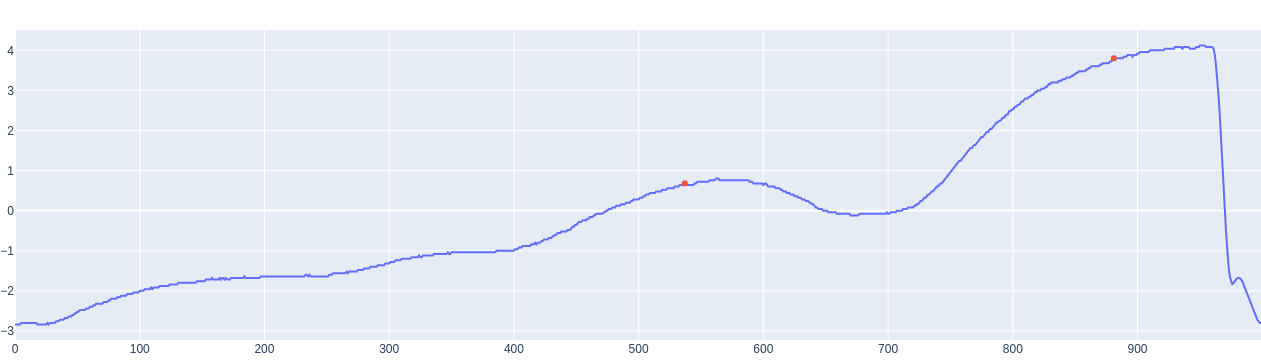

1666.67ppm.csv


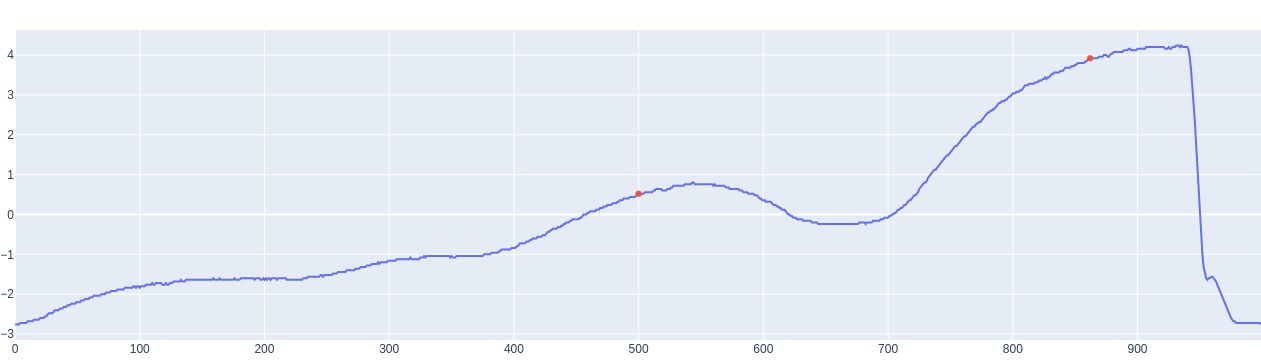

In [32]:
# First iteration
for wave, arr in waves15.items():
    a, b = find_edges(arr)
    print(wave)
    plotter(arr, None, [a, arr[a]], [b, arr[b]])

3750.00ppm.csv


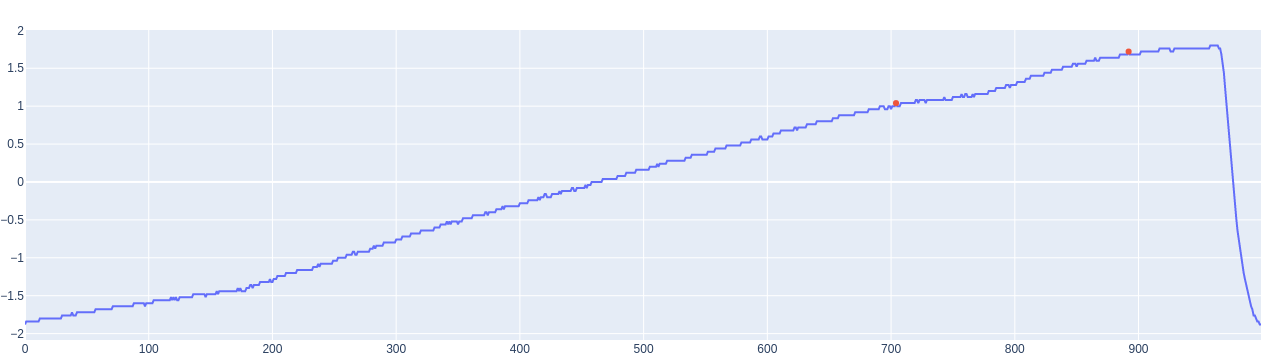

5000.00ppm.csv


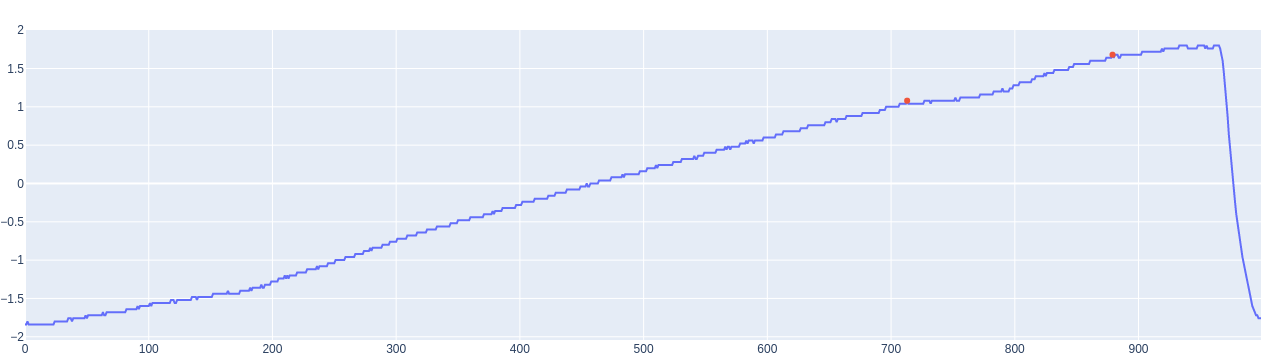

3243.24ppm.csv


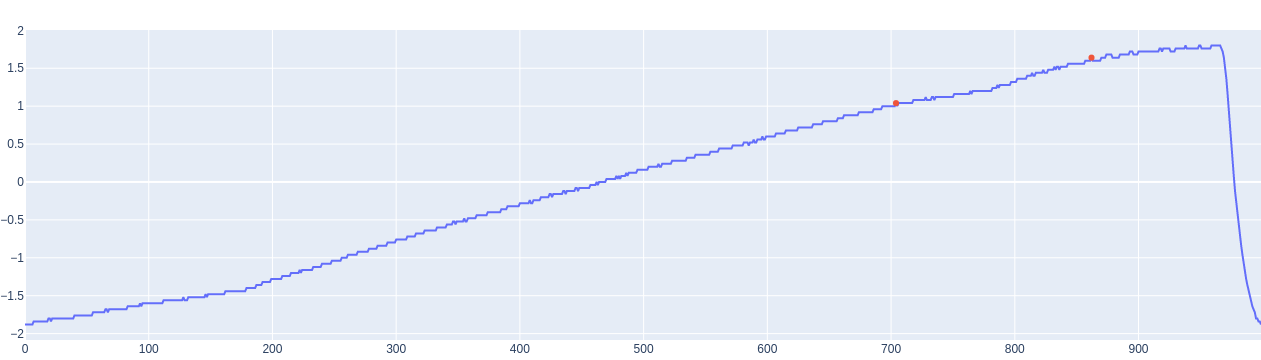

4444.44ppm.csv


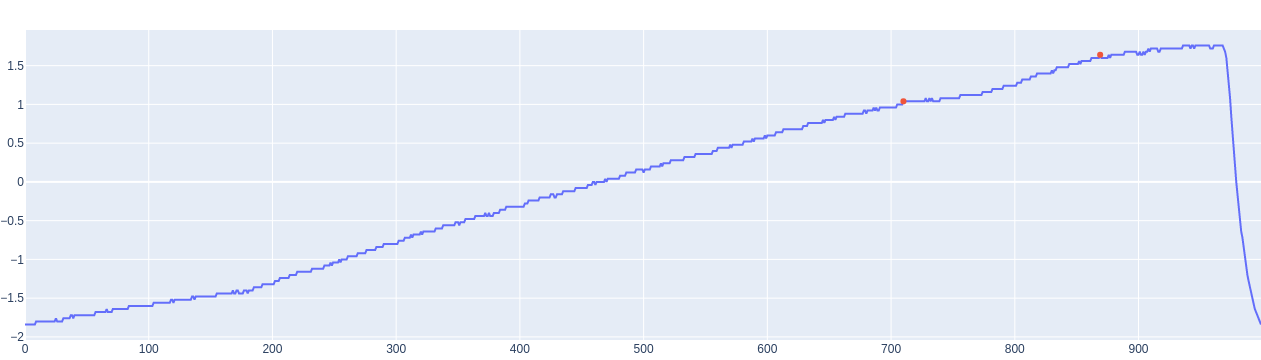

8333.33ppm.csv


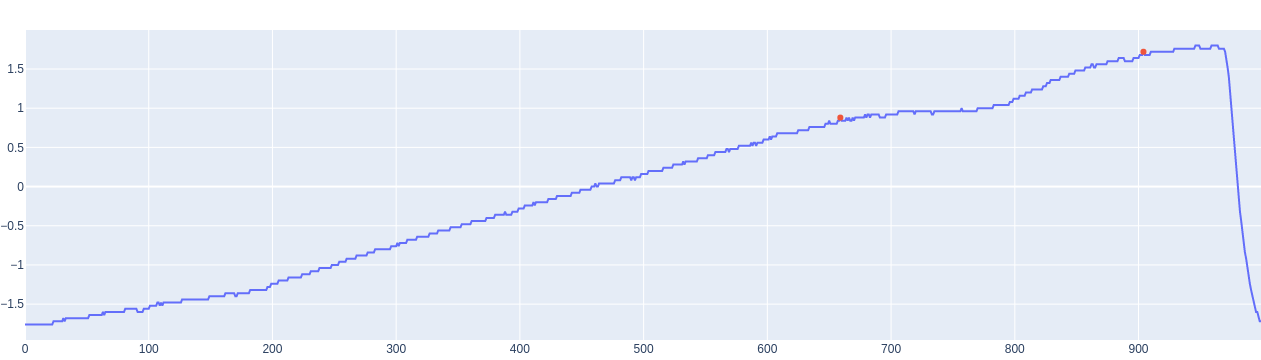

4186.05ppm.csv


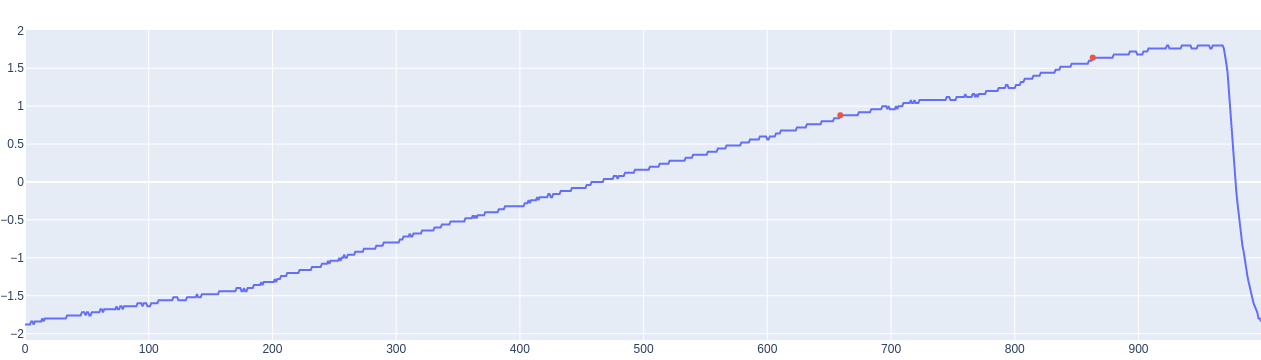

2647.06ppm.csv


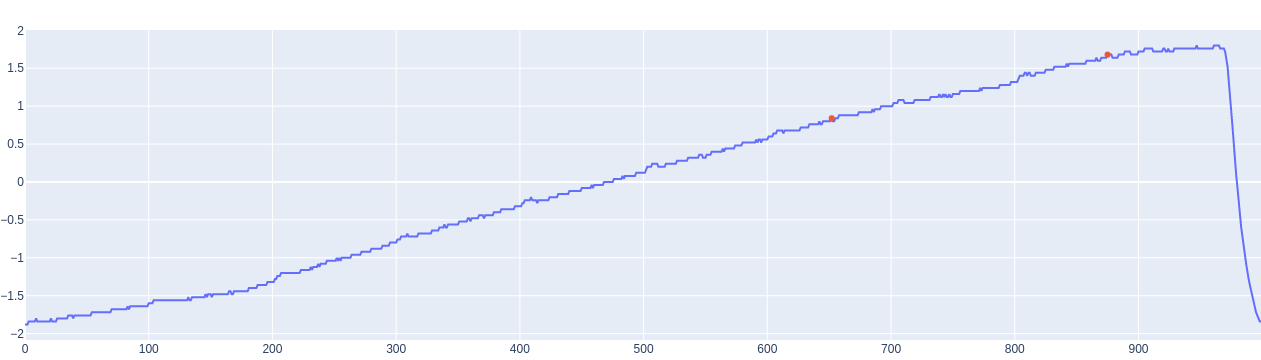

0.00ppm.csv


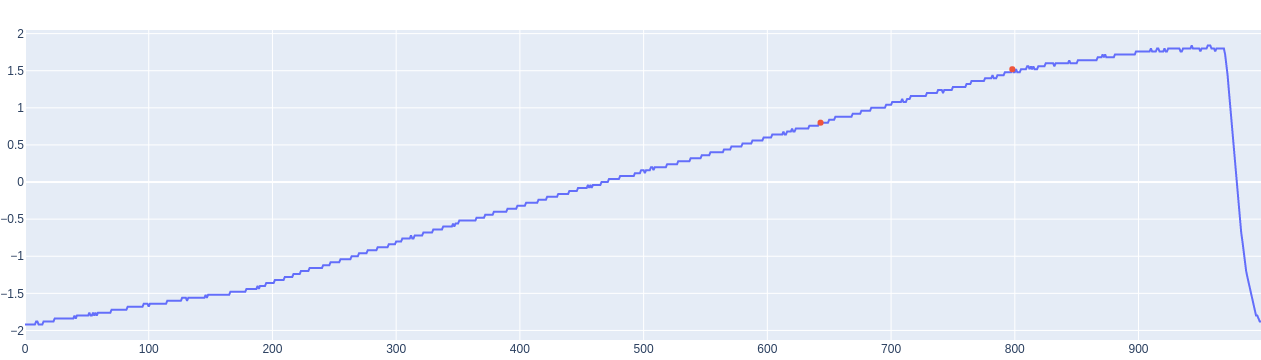

4897.96ppm.csv


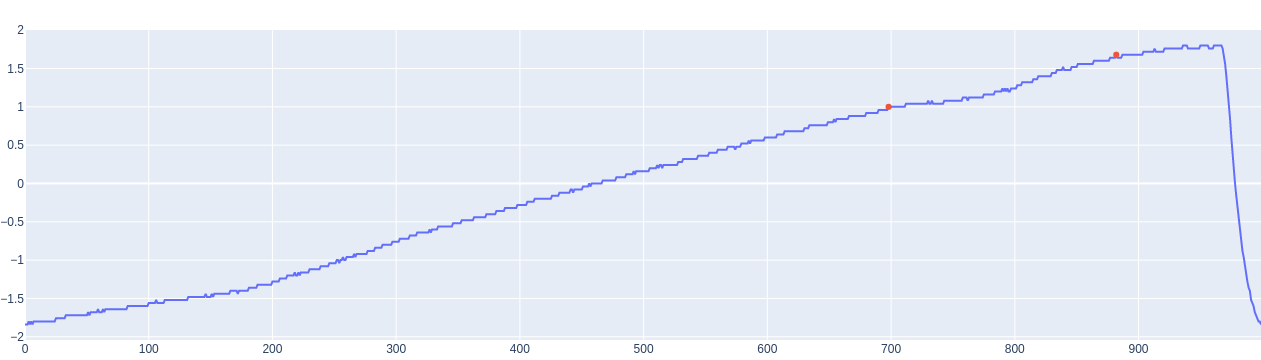

7142.86ppm.csv


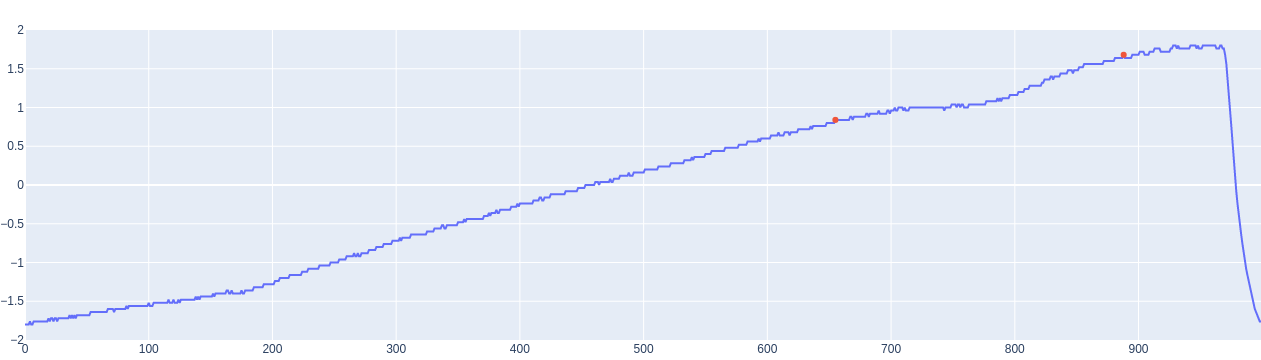

5555.56ppm.csv


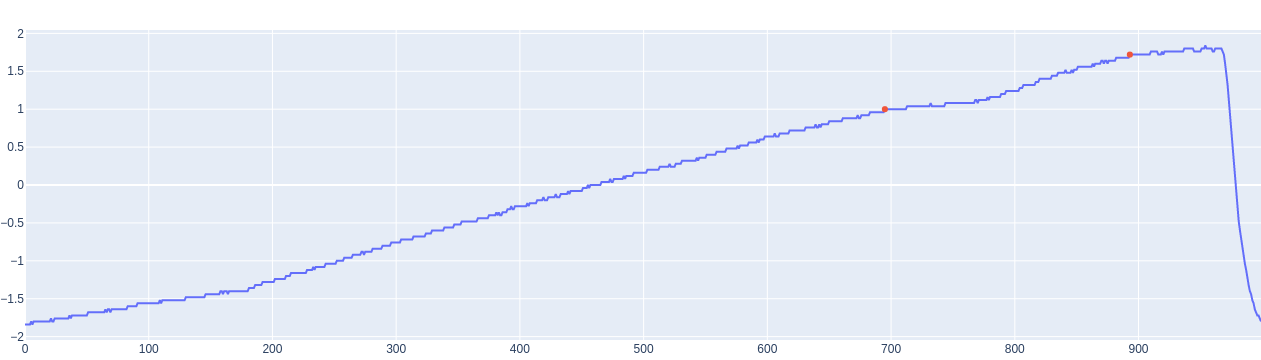

4791.67ppm.csv


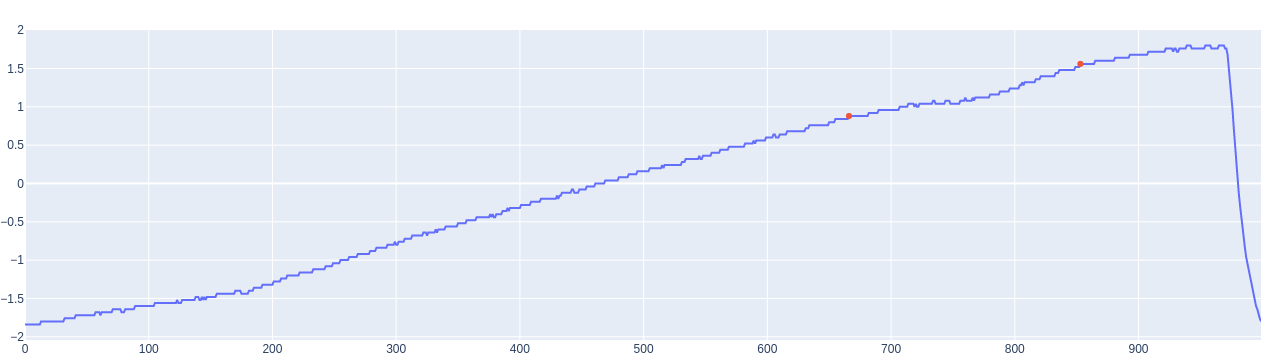

4680.85ppm.csv


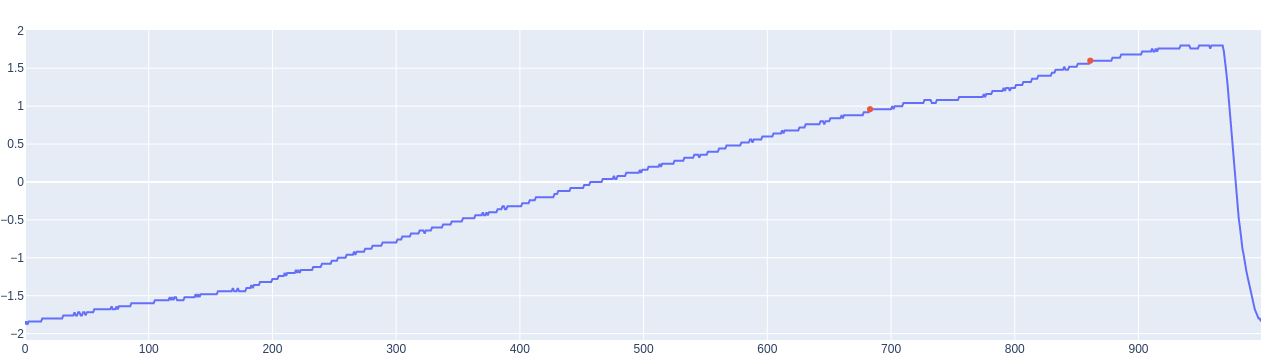

3055.56ppm.csv


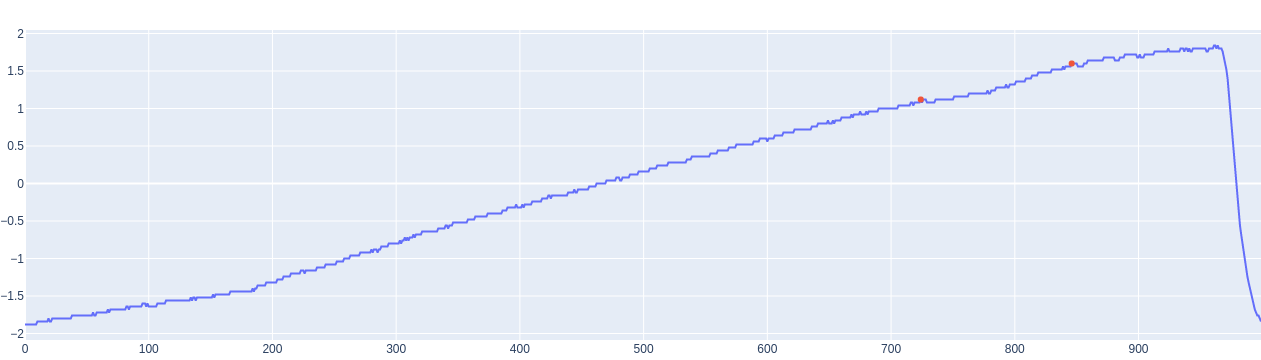

10000.00ppm.csv


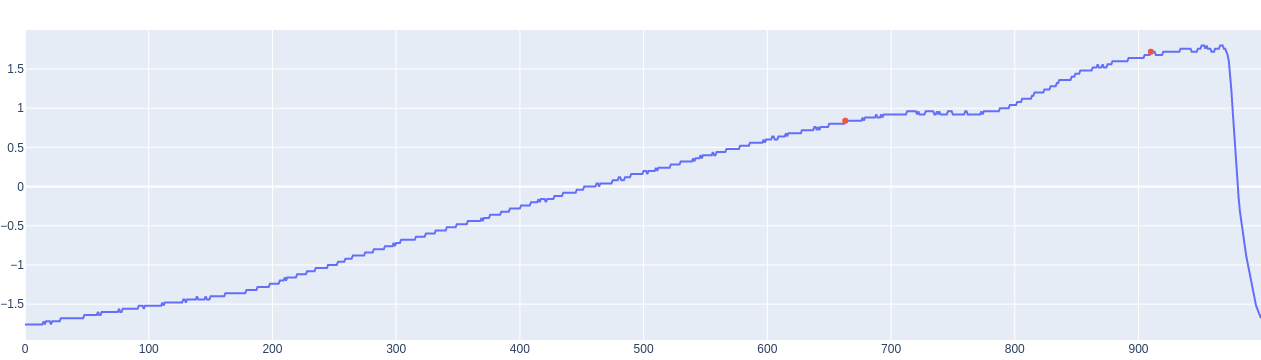

2857.14ppm.csv


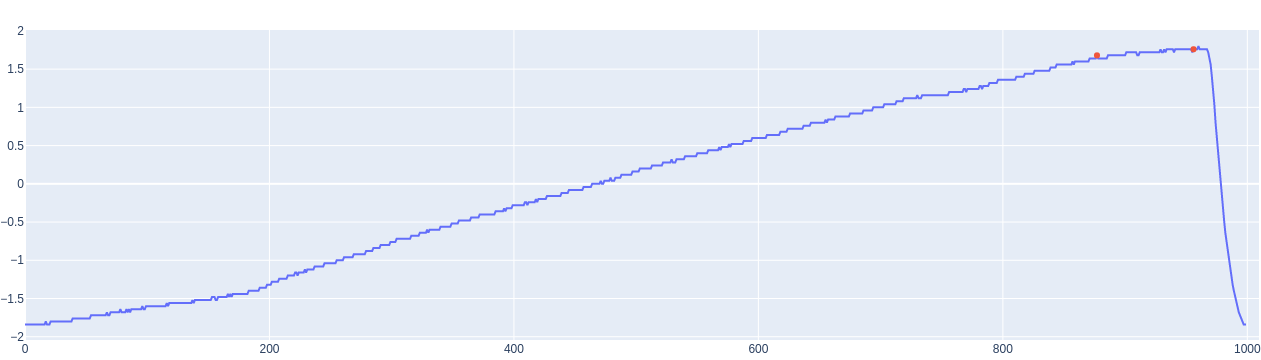

2424.24ppm.csv


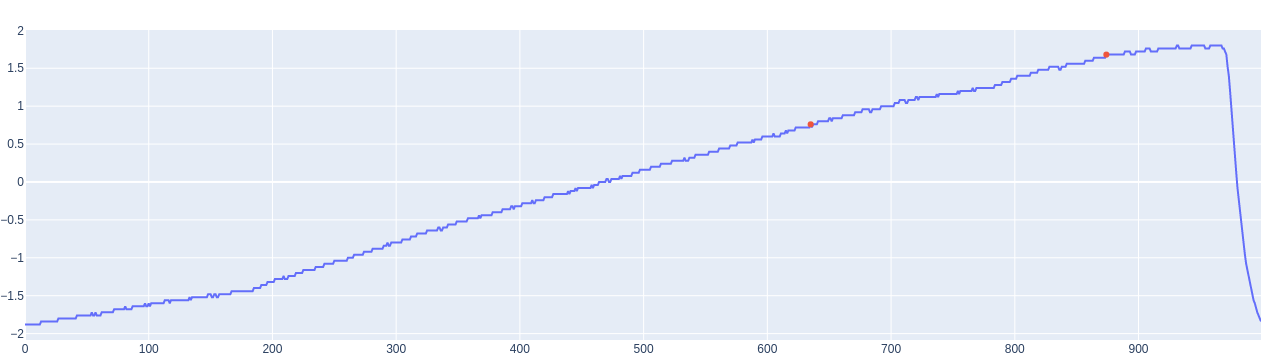

6250.00ppm.csv


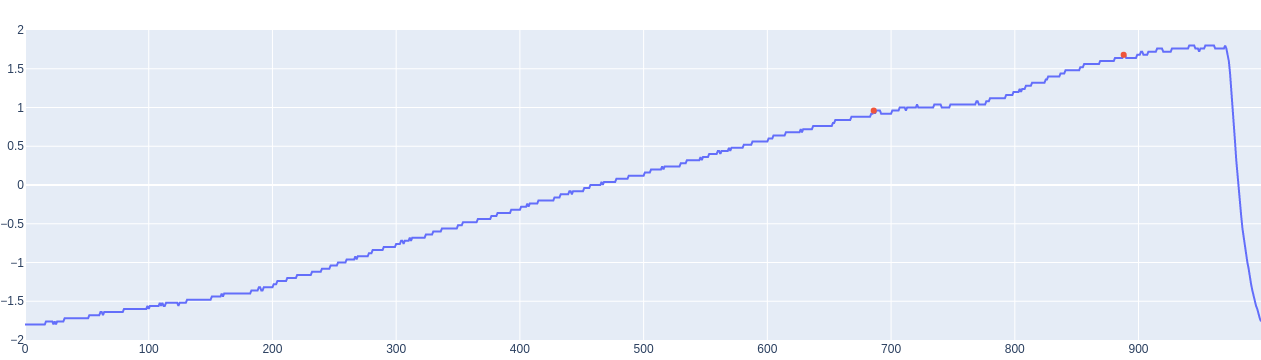

3421.05ppm.csv


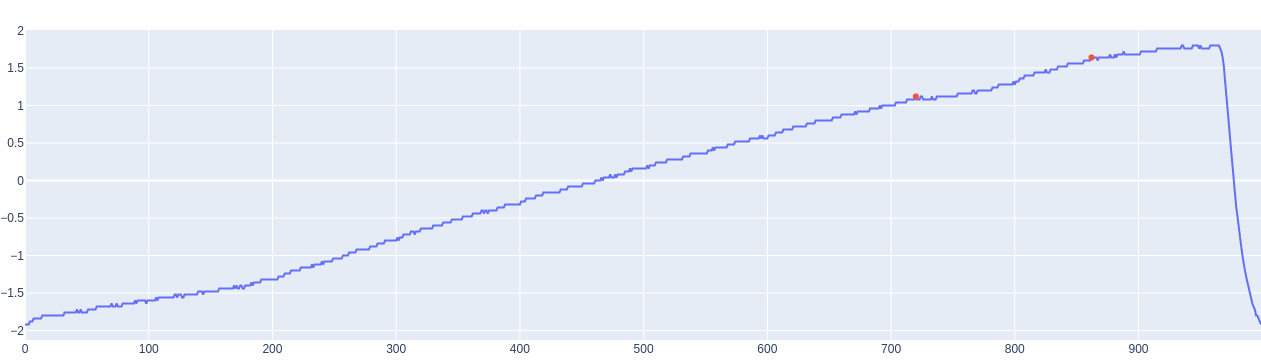

1935.48ppm.csv


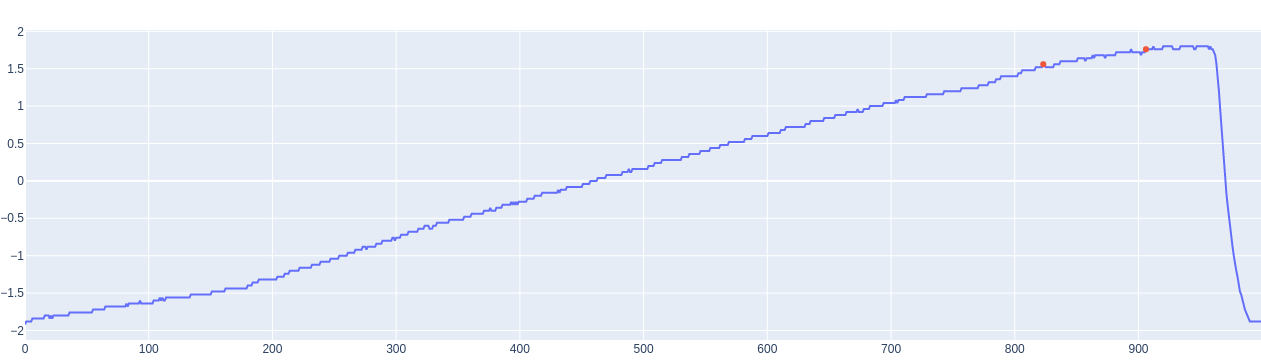

2187.50ppm.csv


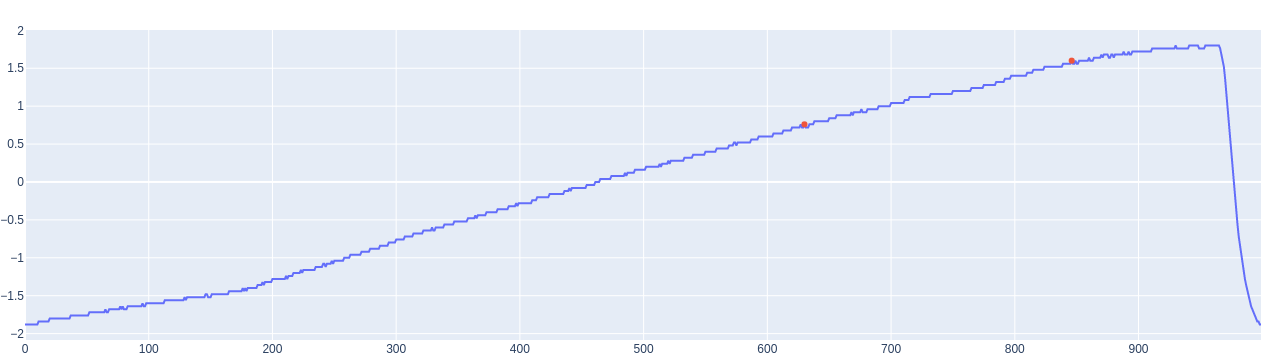

1666.67ppm.csv


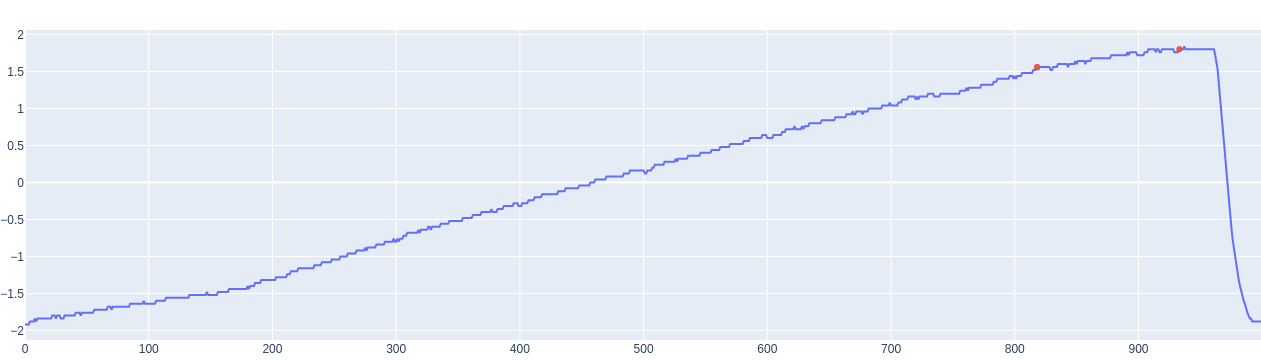

In [33]:
# Second iteration
for wave, arr in waves25.items():
    a, b = find_edges(arr)
    print(wave)
    plotter(arr, None, [a, arr[a]], [b, arr[b]])

3750.00ppm.csv


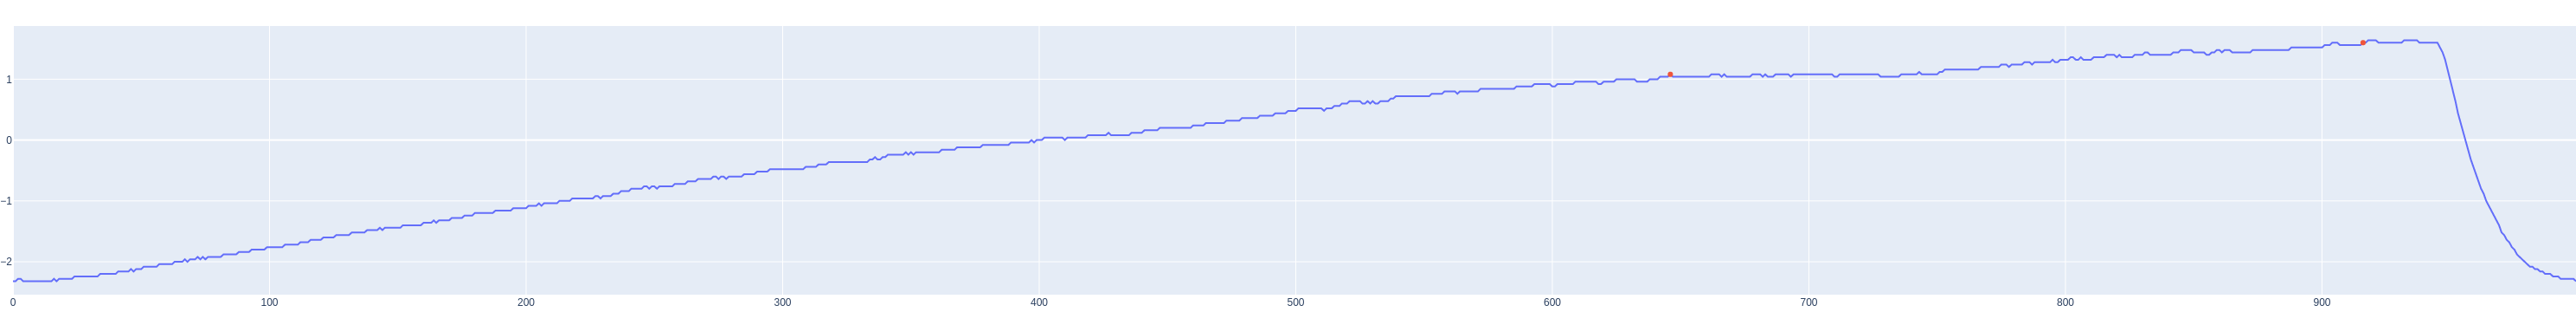

5000.00ppm.csv


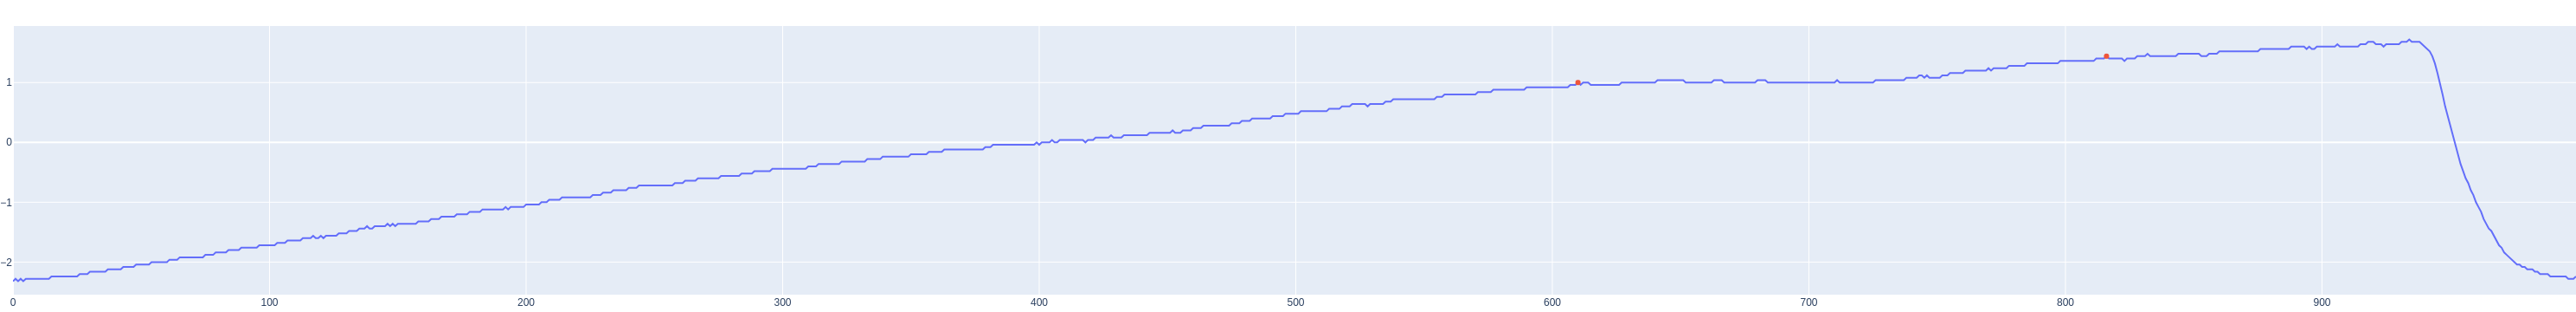

3243.24ppm.csv


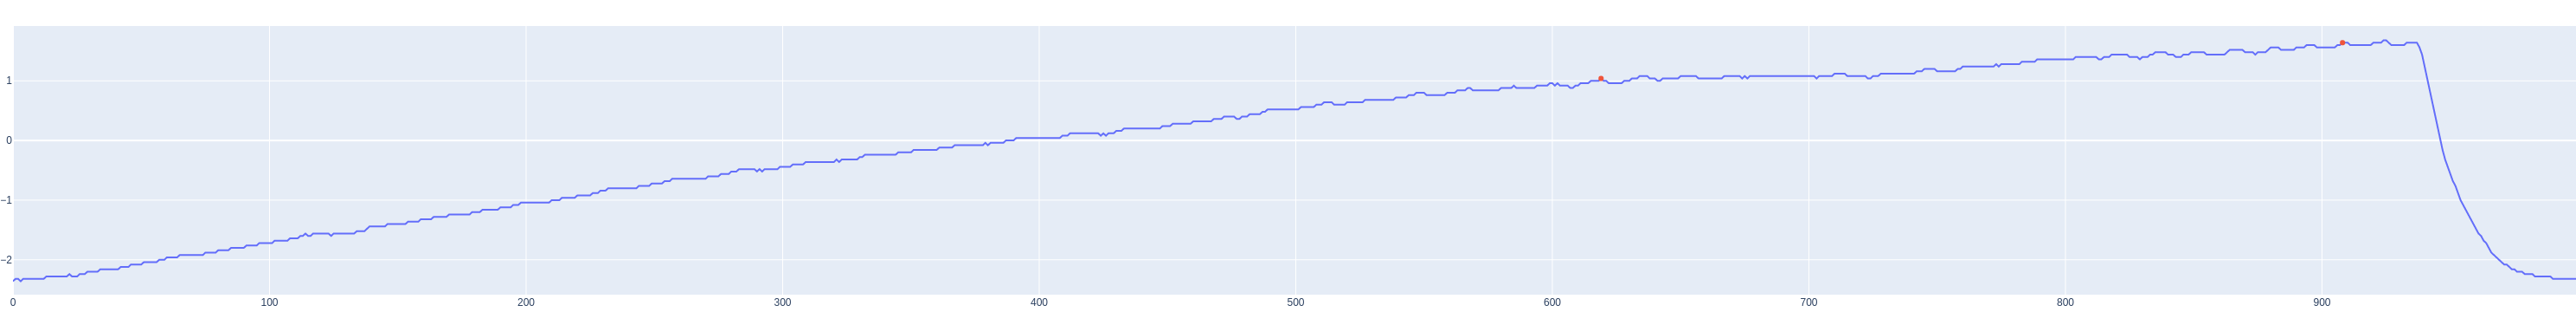

4444.44ppm.csv


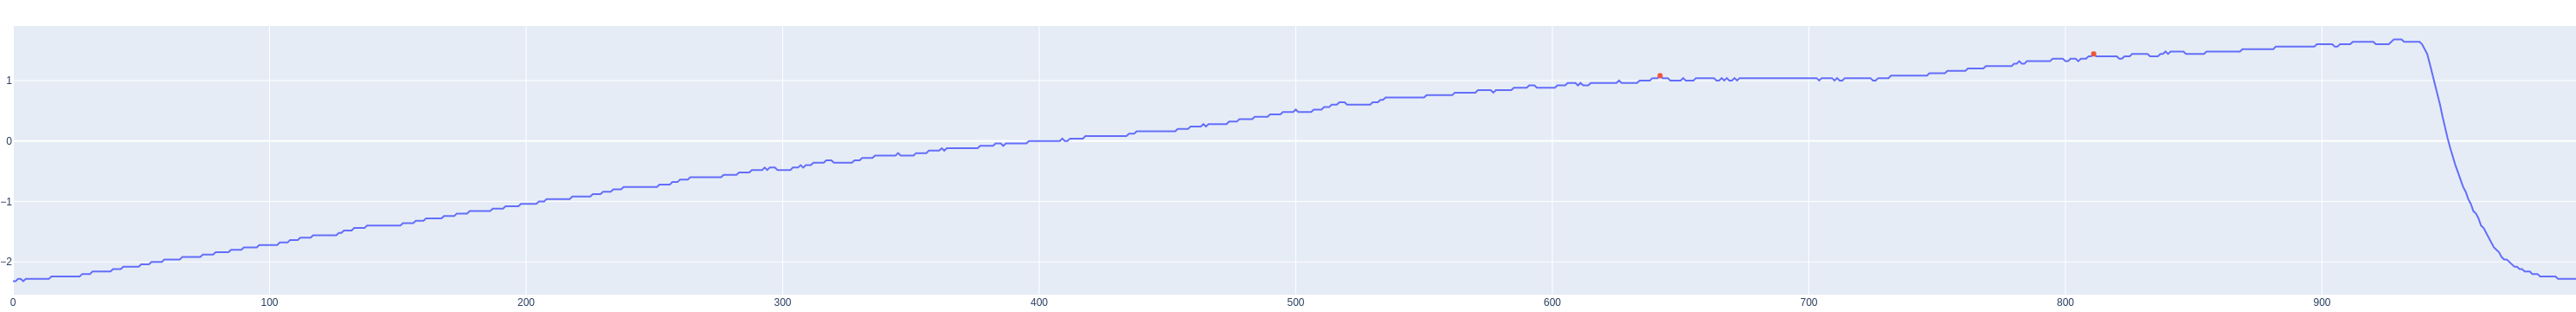

8333.33ppm.csv


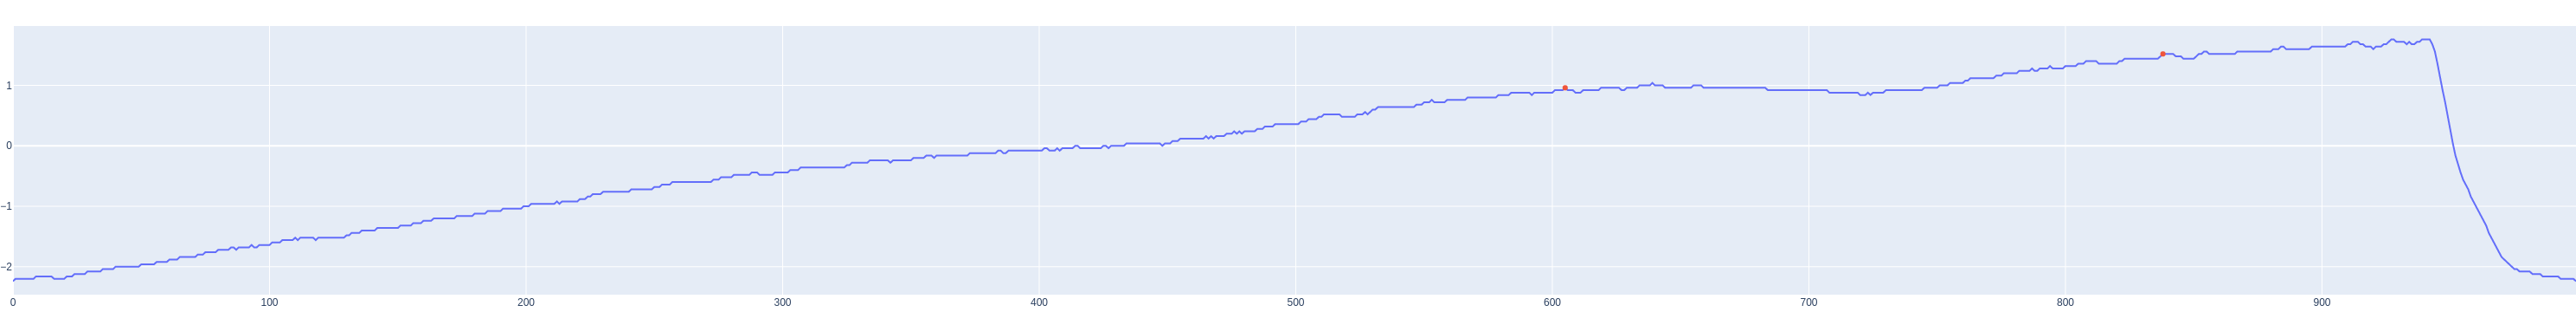

4186.05ppm.csv


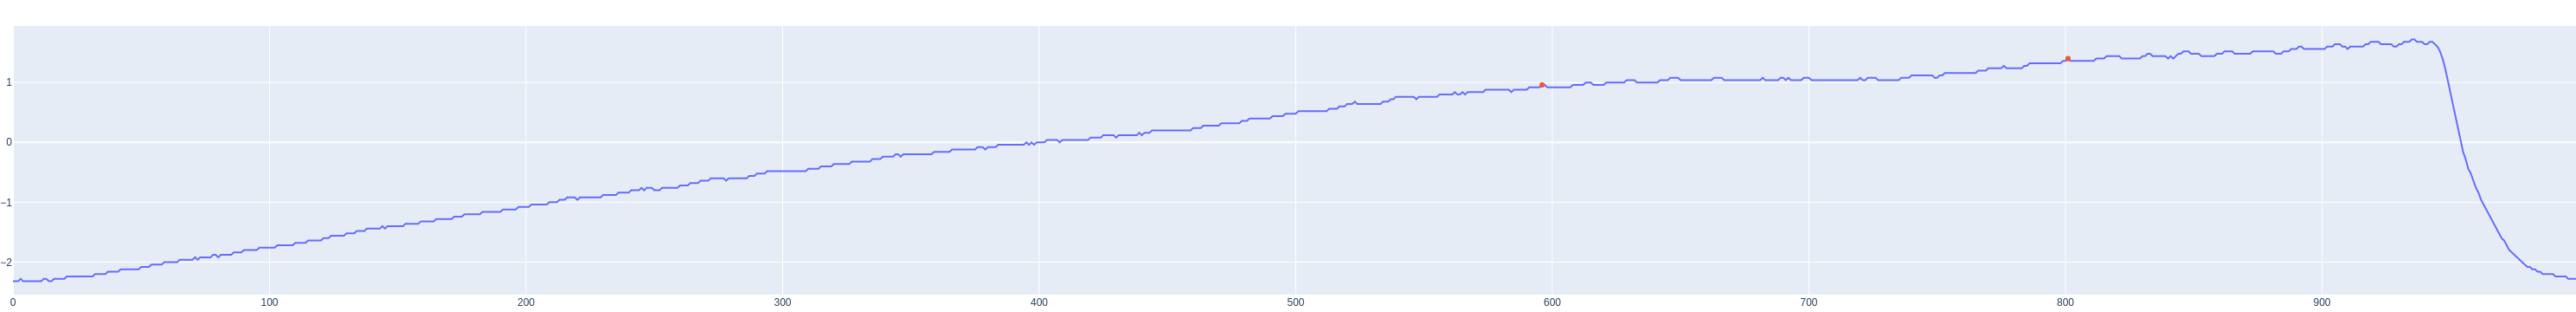

2647.06ppm.csv


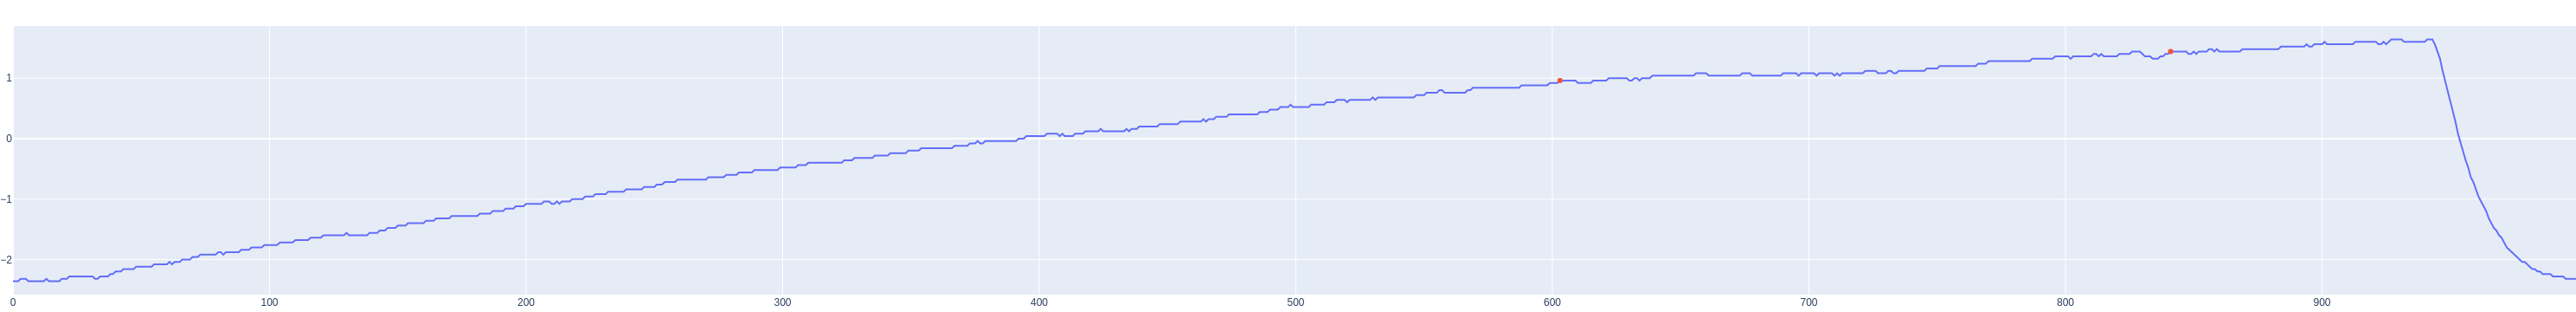

0.00ppm.csv


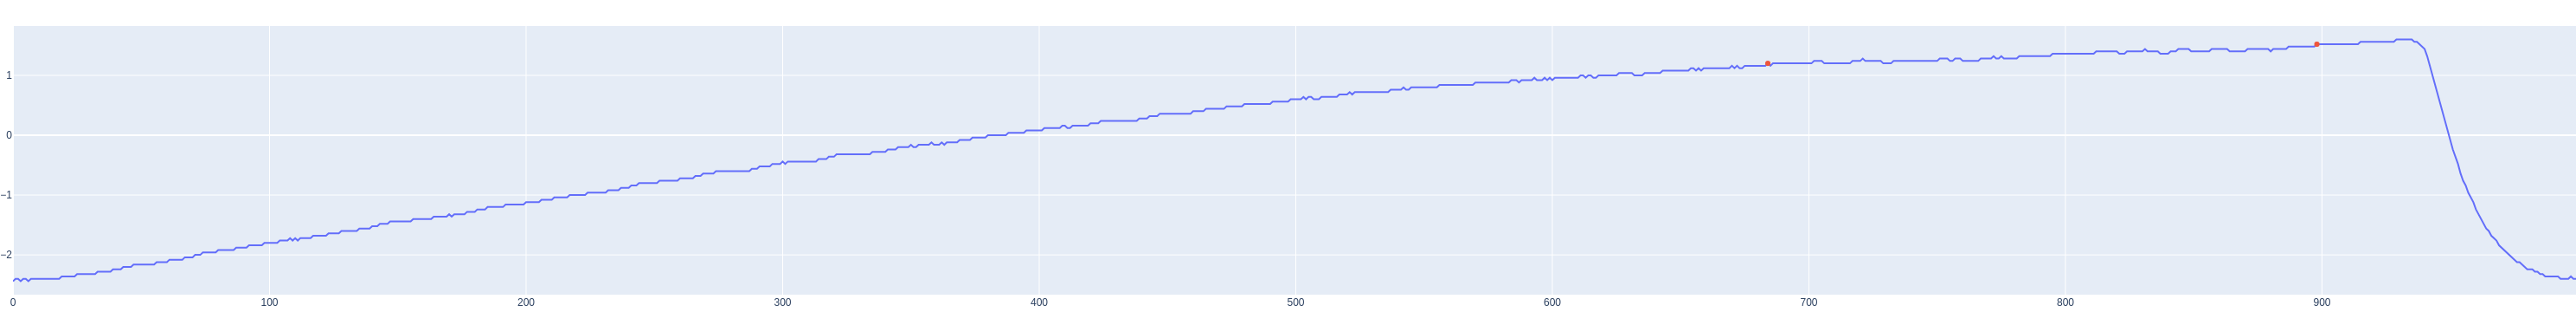

4897.96ppm.csv


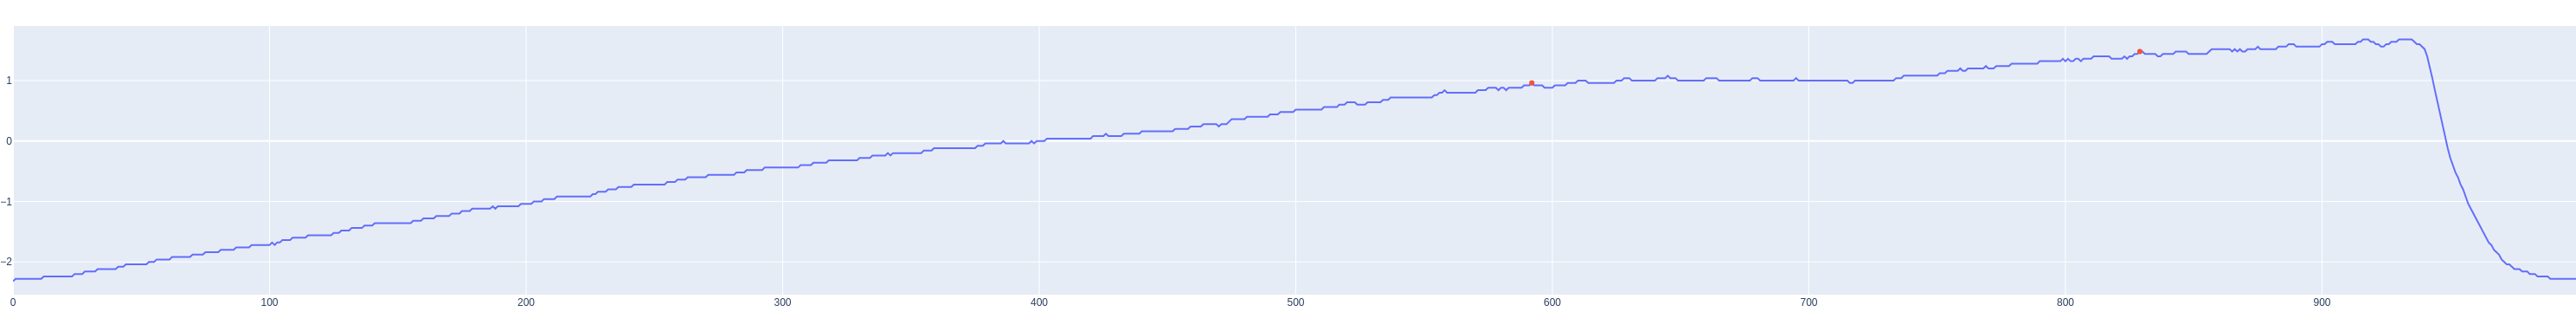

7142.86ppm.csv


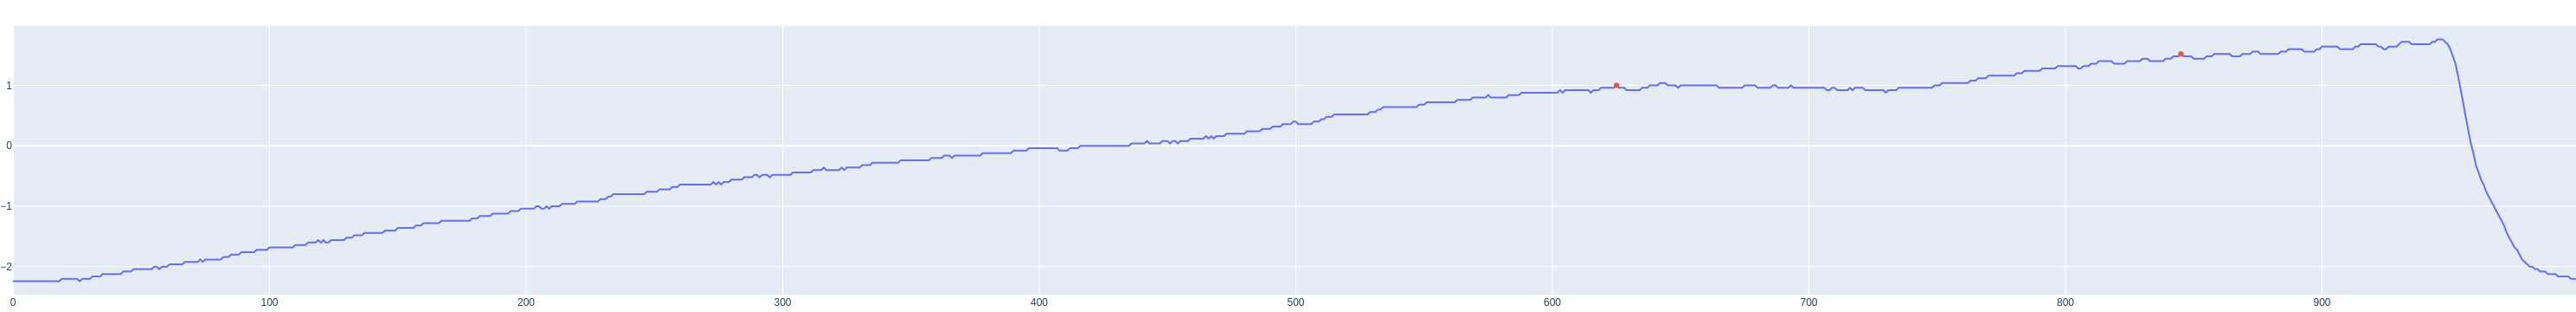

5555.56ppm.csv


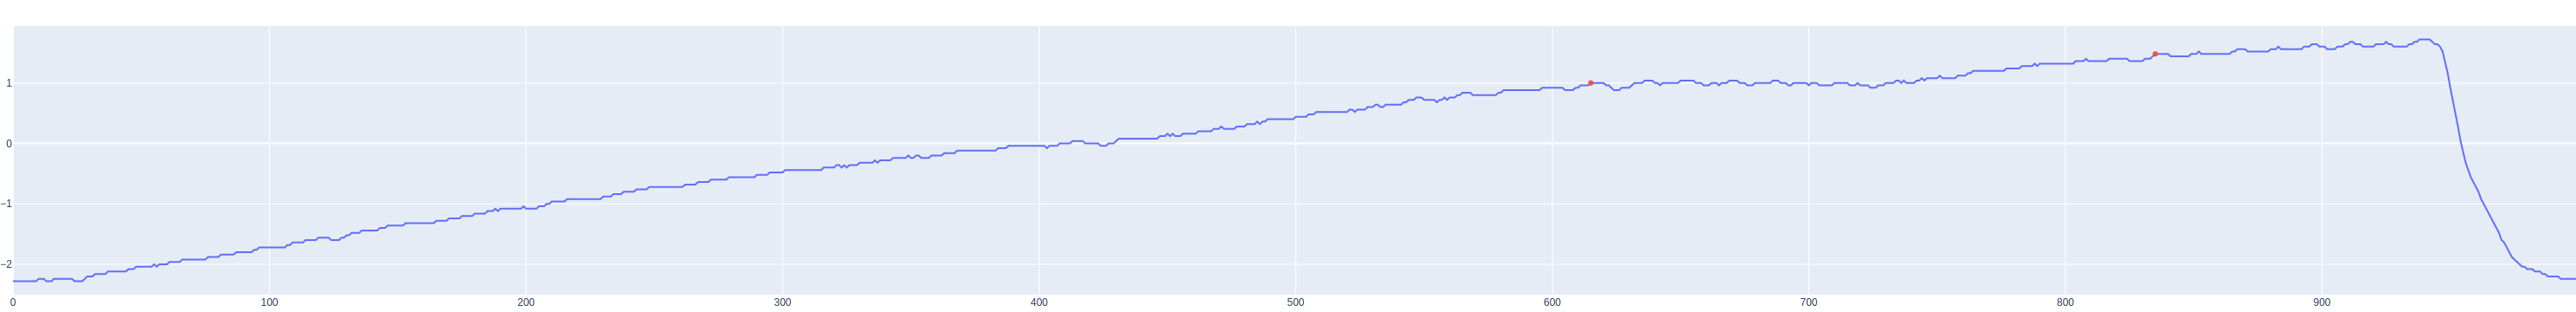

4791.67ppm.csv


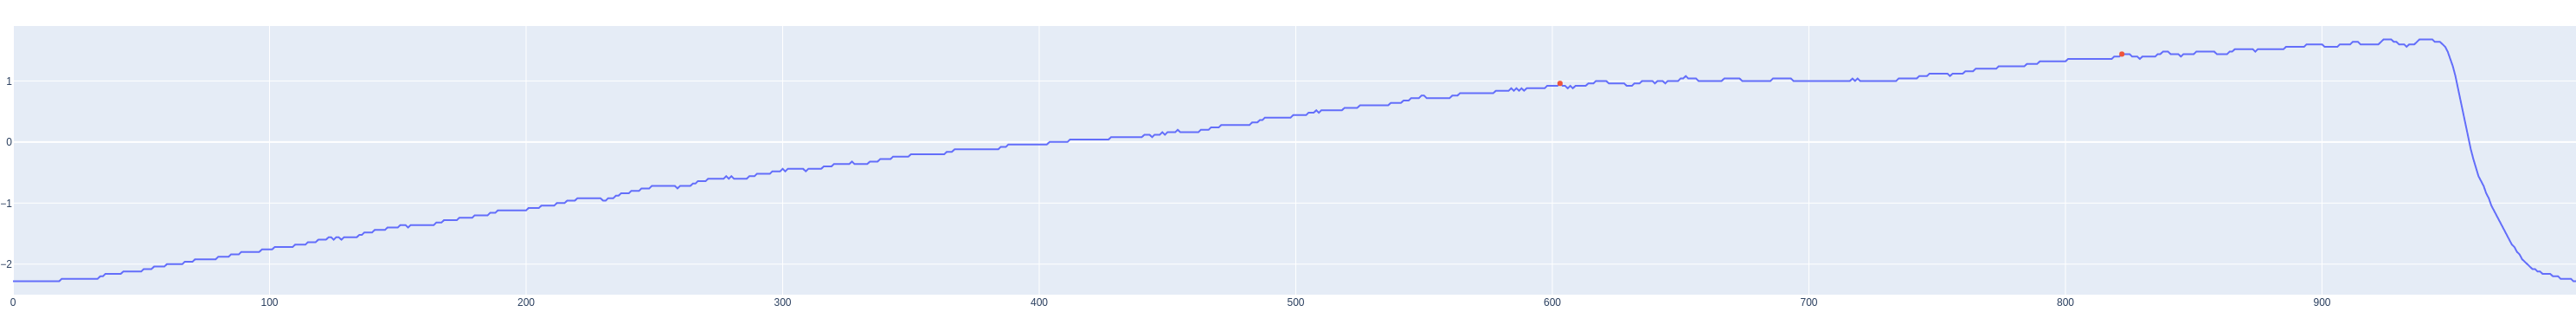

4680.85ppm.csv


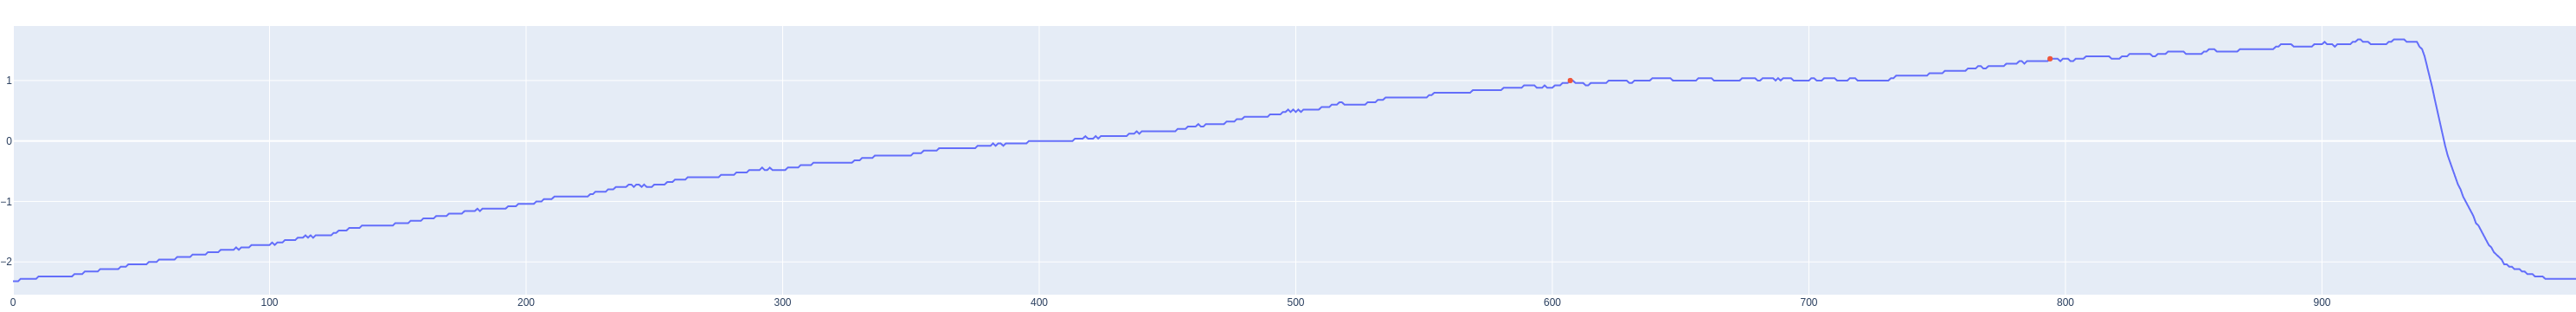

3055.56ppm.csv


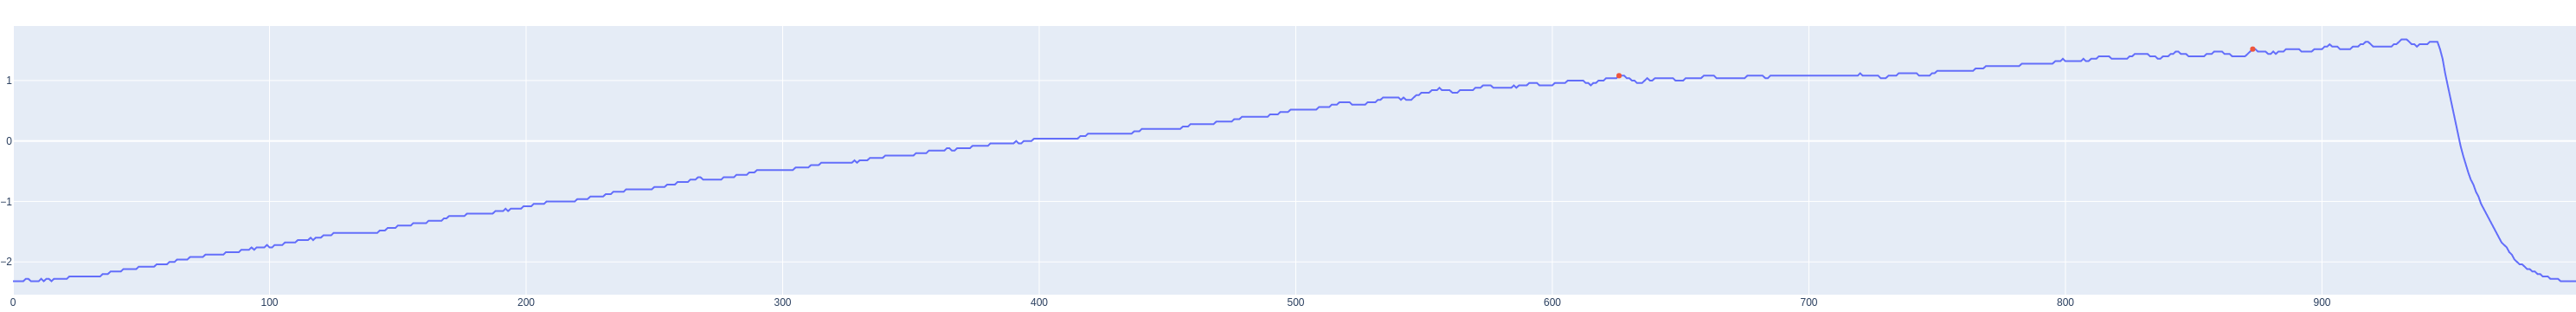

10000.00ppm.csv


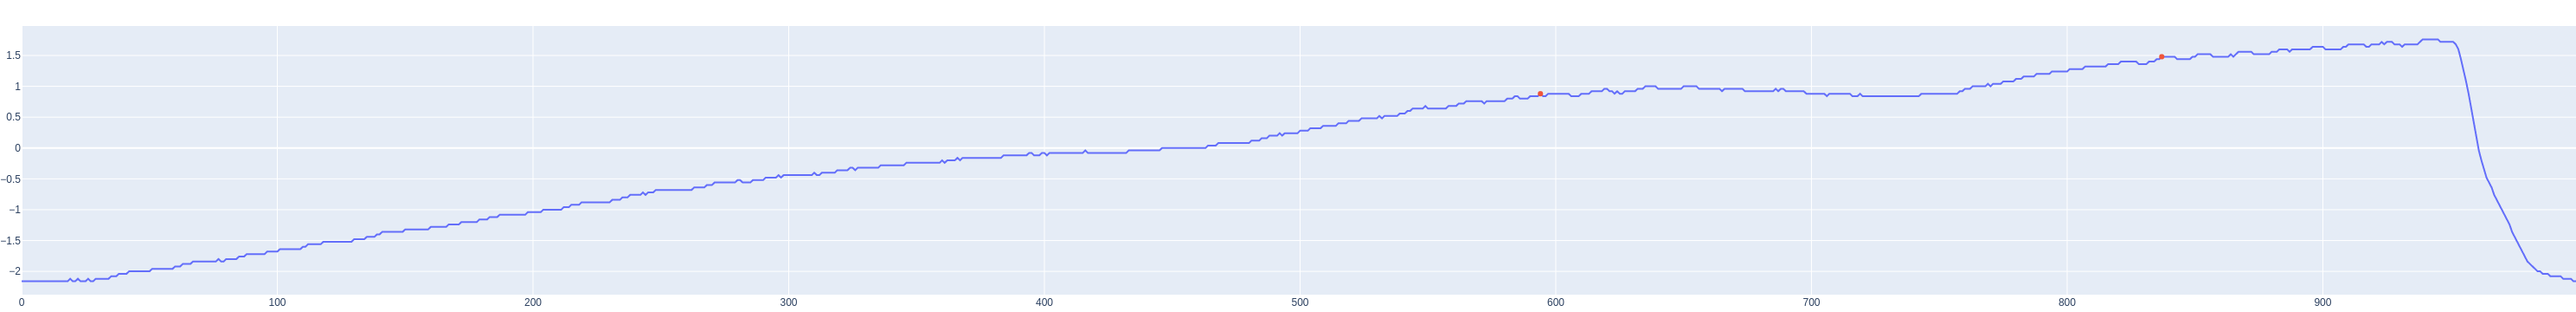

2857.14ppm.csv


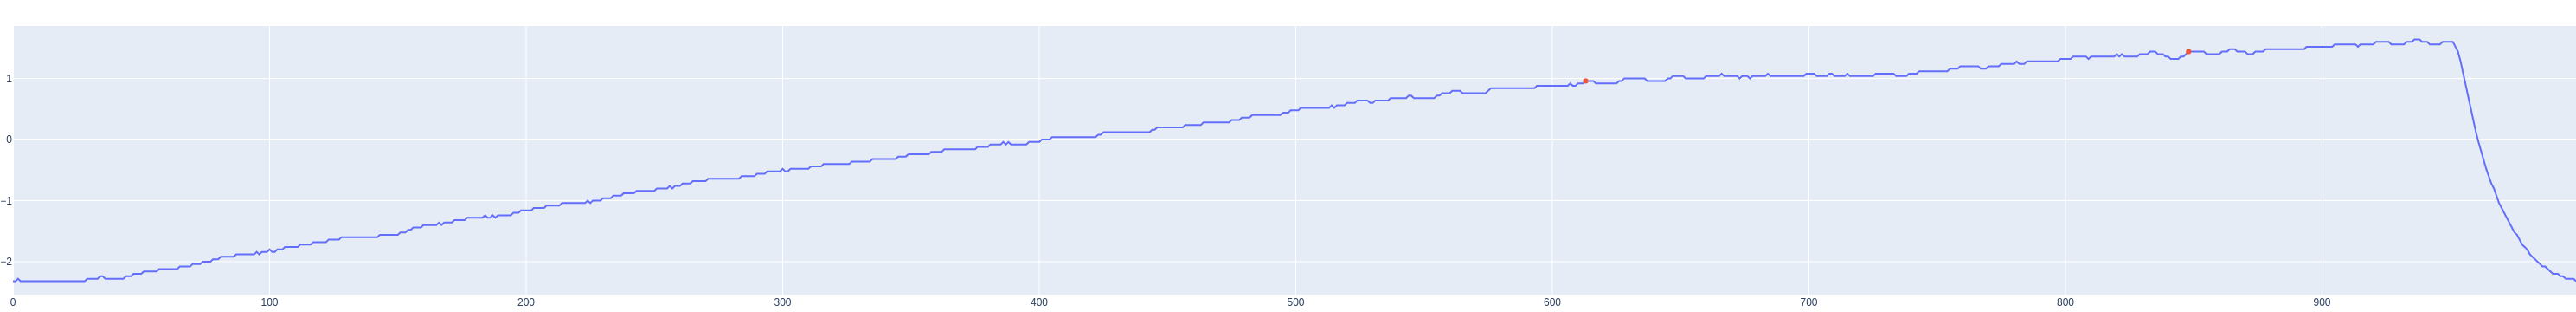

2424.24ppm.csv


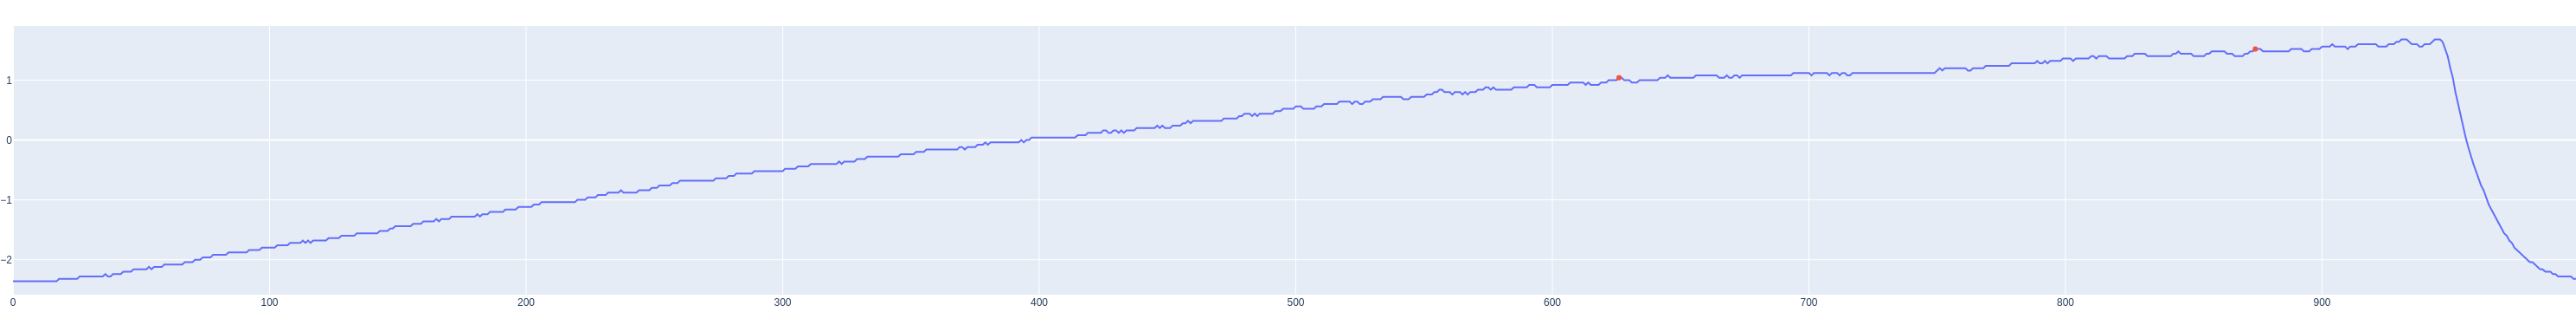

6250.00ppm.csv


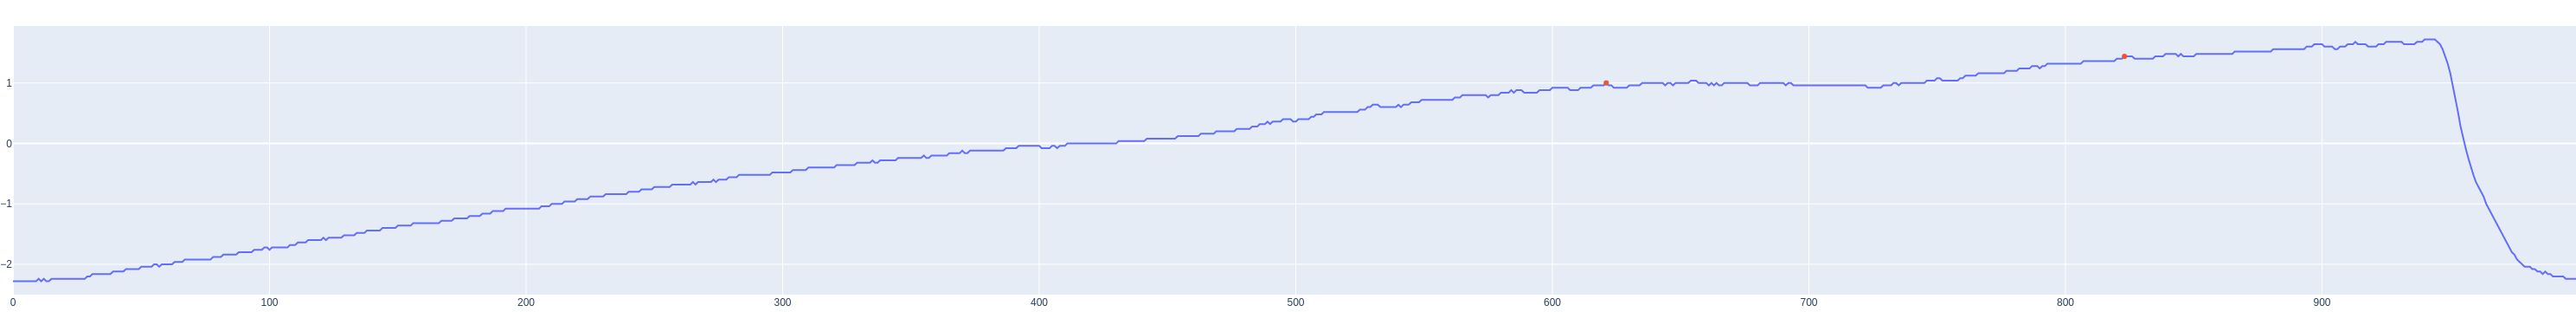

3421.05ppm.csv


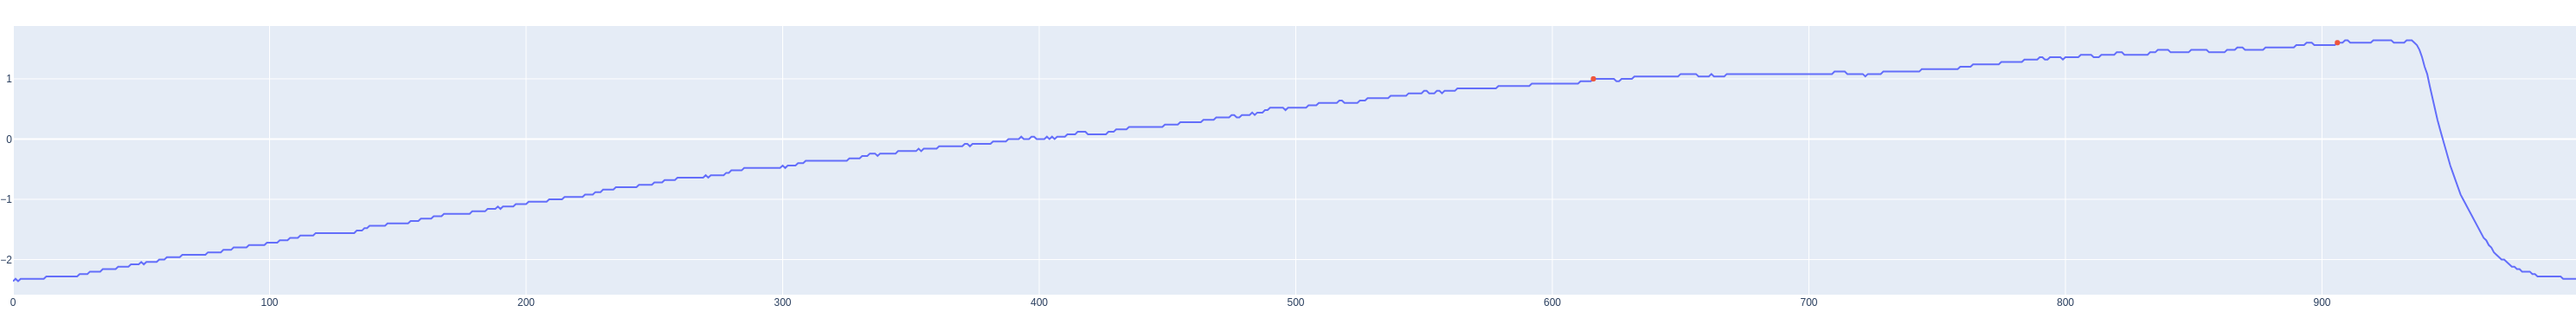

1935.48ppm.csv


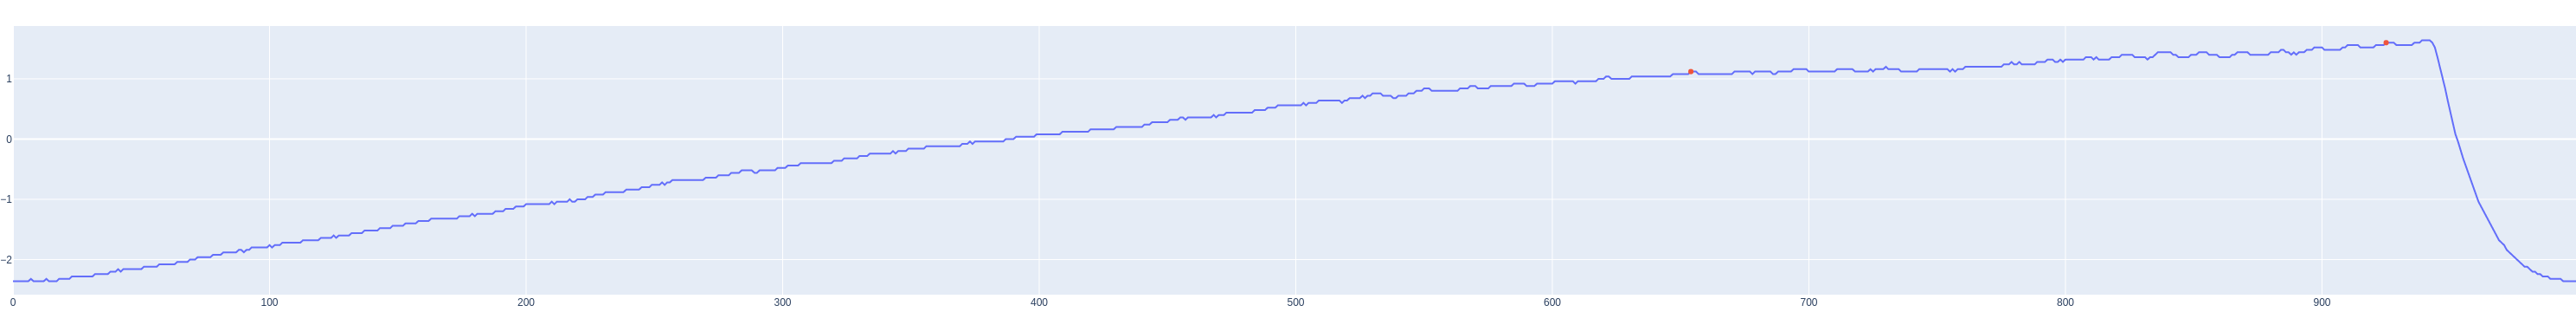

2187.50ppm.csv


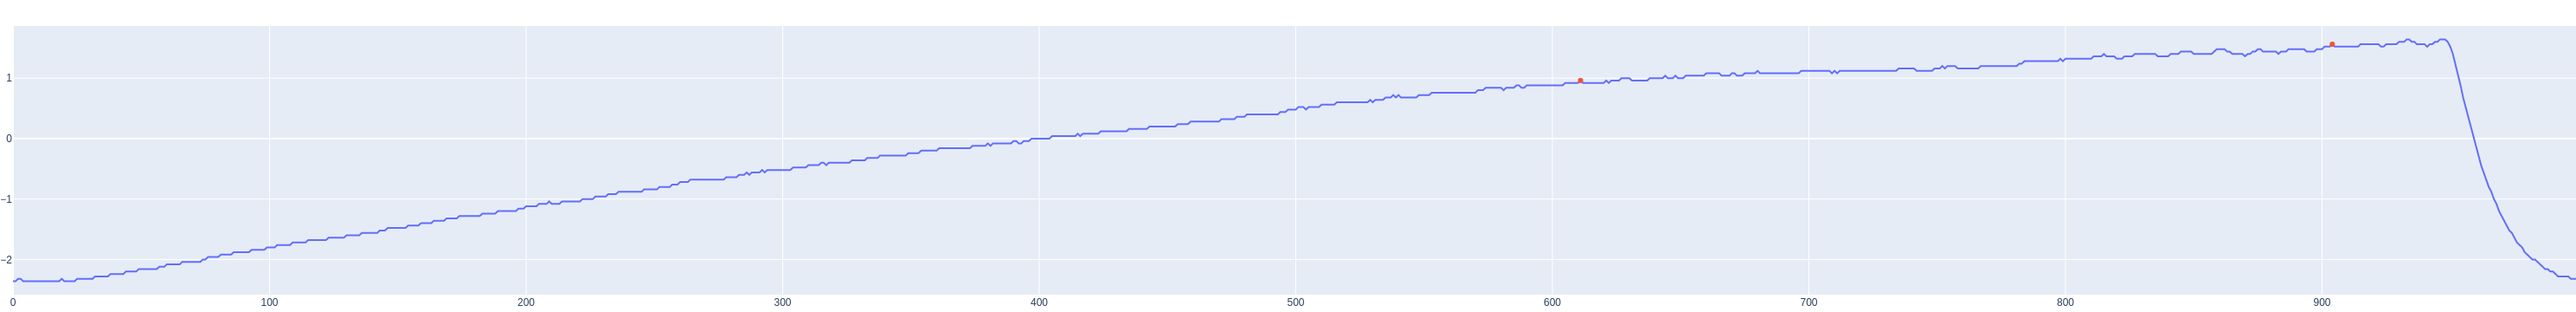

1666.67ppm.csv


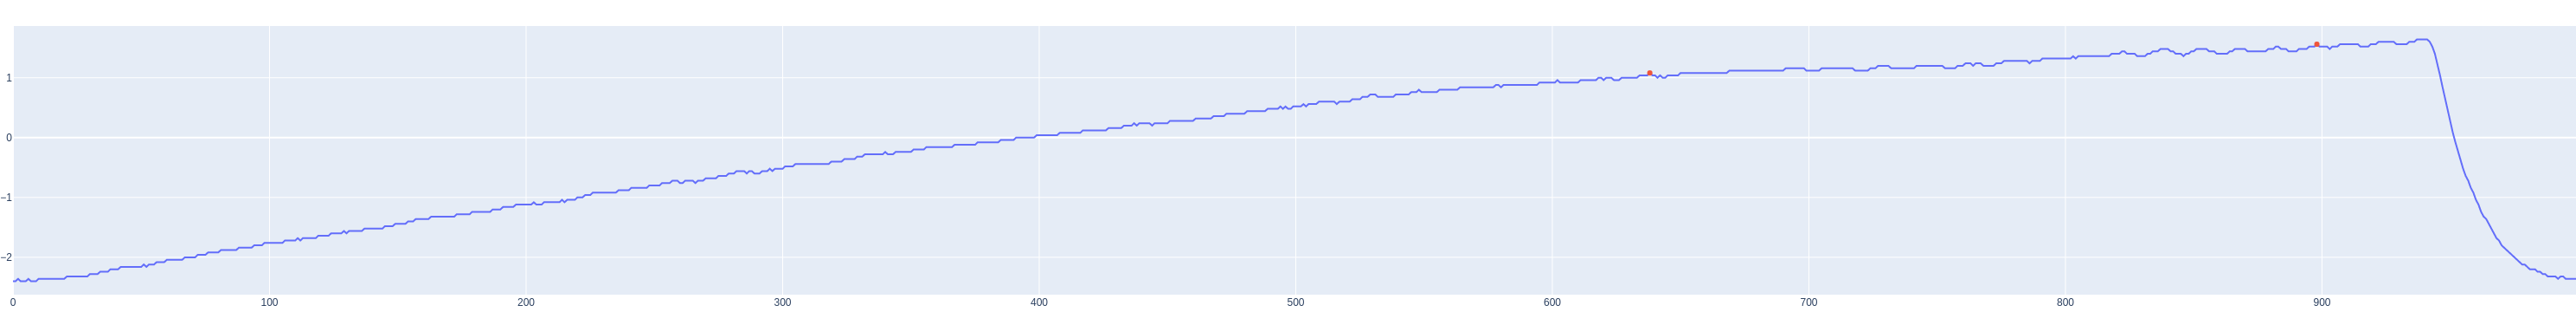

In [15]:
# Third iteration
for wave, arr in waves7.items():
    a, b = find_edges(arr)
    print(wave)
    plotter(arr, None, [a, arr[a]], [b, arr[b]])